# INSURANCE CLAIMS (Internship Student Solution)

## Done by Michael (Chukwudi) Okereafor


© Explore AI Academy

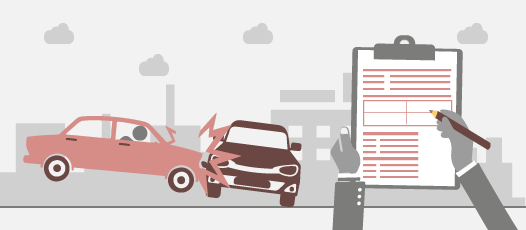

### Project Overview: Insurance Claims

The aim of this project is to predict the average claim amount per exposure, for specific risk profiles.    
A risk profile describes a policyholder (someone who is a client and owns a policy at the insurer), things like age, gender, marital status, etc. These attributes can all be found in the dataset used in this project. The reason for doing this is so that the predicted claim can be used to calculate a premium for new applicants, based on their predicted risk. This way the insurer maximises profits by charging higher premiums for higher risk profiles. It is important to consider however that accompanying a higher premium, the insurer should maintain sensibility in deciding on a premium and still outcompete competitor insurers, which make business rules essential. 

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Data Cleaning </a>

<a href=#three>4. Exploratory Data Analysis (EDA)</a>

<a href=#four>5. Data Engineering</a>

<a href=#five>6. Modeling</a>

<a href=#six>7. Model Performance</a>

<a href=#seven>8. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

In [1]:
# Libraries for data loading, data manipulation and data visulisation
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
%matplotlib inline
from datetime import datetime, date
import warnings

import plotly.express as px
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
import re
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Binarizer
from sklearn.preprocessing import KBinsDiscretizer
from fast_ml.model_development import train_valid_test_split
from fast_ml.feature_engineering import FeatureEngineering_Categorical
from fast_ml.feature_engineering import FeatureEngineering_Numerical
from fast_ml.feature_engineering import FeatureEngineering_DateTime
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostRegressor
import xgboost as xgb
from sklearn.ensemble import GradientBoostingRegressor
from catboost import CatBoostRegressor
from statsmodels.compat import lzip
from statsmodels.graphics.api import abline_plot
from patsy import dmatrices
import statsmodels.api as sm
from sklearn.utils.validation import check_array
from sklearn import metrics 
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.inspection import permutation_importance
import shap
import math
import pickle


warnings.filterwarnings("ignore")

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>


In [2]:
ins_claim_df = pd.read_excel('DataSet.xlsx')

In [3]:
ins_claim_df.head(5)

,PolicyId,ClaimId,SumTotalClaimAmount,CountTotalClaimAmount,PremiumSum,CasePremiumSum,PaymentDueDate,TotalPremiumPaymentCount,PreviousInsurerExcess,PreviousInsurerPremium,...,CommencementDt,PolicyEndDate,SumAssured,MeanExcess,TotalExcess,ExcessTypesCount,BaseExcess,NomimatedDriversCount,NomimatedDriversUnder30Count,0.5865768182345752
0,10806273,NaN,NaN,NaN,4915.98,4369.76,2021-12-29,8.0,0.0,0.0,...,2020-01-06,2021-12-29 14:46:25.4847000,45700.0,3166.666666,19000.0,6.0,1000.0,2.0,1.0,0.376611
1,10822247,NaN,NaN,NaN,3342.60,668.52,2020-09-30,1.0,4500.0,900.0,...,2020-05-18,2020-10-16 00:00:44.0122000,113100.0,4500.000000,9000.0,2.0,5000.0,1.0,1.0,0.788738
2,10941976,NaN,NaN,NaN,1762.54,1762.54,2022-07-28,3.0,0.0,808.0,...,2022-05-30,NaN,92900.0,3333.333333,20000.0,6.0,1000.0,0.0,0.0,0.375597
3,10782539,NaN,NaN,NaN,3723.60,3723.60,2021-08-31,5.0,0.0,0.0,...,2019-07-18,2021-09-25 14:09:25.7650000,173800.0,5720.000000,34320.0,6.0,5000.0,1.0,0.0,0.773472
4,10916477,NaN,NaN,NaN,2478.72,0.00,2022-03-31,0.0,0.0,0.0,...,2022-01-10,2022-04-16 00:02:41.8644000,240200.0,6286.666666,37720.0,6.0,5000.0,0.0,0.0,0.278507


In [4]:
# number of observations and features
ins_claim_df.shape

(262990, 45)

In [5]:
#checking for duplicates
# Rows containing duplicate data
duplicate_rows_df = ins_claim_df[ins_claim_df.duplicated()]
print("number of duplicate rows:", duplicate_rows_df.shape)

number of duplicate rows: (0, 45)


In [6]:
duplicate_rows_df.head()

,PolicyId,ClaimId,SumTotalClaimAmount,CountTotalClaimAmount,PremiumSum,CasePremiumSum,PaymentDueDate,TotalPremiumPaymentCount,PreviousInsurerExcess,PreviousInsurerPremium,...,CommencementDt,PolicyEndDate,SumAssured,MeanExcess,TotalExcess,ExcessTypesCount,BaseExcess,NomimatedDriversCount,NomimatedDriversUnder30Count,0.5865768182345752


These are not actually duplicates, so I will leave it as it is.

In [7]:
#checking and counting hull values
ins_claim_df.isnull().sum()

PolicyId                                     0
ClaimId                                 235512
SumTotalClaimAmount                     235598
CountTotalClaimAmount                   235512
PremiumSum                                 240
CasePremiumSum                             240
PaymentDueDate                             240
TotalPremiumPaymentCount                   240
PreviousInsurerExcess                       27
PreviousInsurerPremium                      29
EmploymentType                            2656
IsMemberPayer                                0
Employer                                255704
Occupation                                2246
IndustryType                              4131
Gender                                       8
BirthDt                                      6
MaritalStatus                                6
Make                                         6
Model                                        6
Colour                                       6
Transmission 

In [8]:
# Datatypes of the dataset
ins_claim_df.dtypes

PolicyId                                         int64
ClaimId                                        float64
SumTotalClaimAmount                            float64
CountTotalClaimAmount                          float64
PremiumSum                                     float64
CasePremiumSum                                 float64
PaymentDueDate                          datetime64[ns]
TotalPremiumPaymentCount                       float64
PreviousInsurerExcess                          float64
PreviousInsurerPremium                         float64
EmploymentType                                  object
IsMemberPayer                                    int64
Employer                                        object
Occupation                                      object
IndustryType                                    object
Gender                                          object
BirthDt                                 datetime64[ns]
MaritalStatus                                   object
Make      

In [9]:
ins_claim_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262990 entries, 0 to 262989
Data columns (total 45 columns):
 #   Column                                Non-Null Count   Dtype         
---  ------                                --------------   -----         
 0   PolicyId                              262990 non-null  int64         
 1   ClaimId                               27478 non-null   float64       
 2   SumTotalClaimAmount                   27392 non-null   float64       
 3   CountTotalClaimAmount                 27478 non-null   float64       
 4   PremiumSum                            262750 non-null  float64       
 5   CasePremiumSum                        262750 non-null  float64       
 6   PaymentDueDate                        262750 non-null  datetime64[ns]
 7   TotalPremiumPaymentCount              262750 non-null  float64       
 8   PreviousInsurerExcess                 262963 non-null  float64       
 9   PreviousInsurerPremium                262961 non-null  floa

In [10]:
# check for and count duplicates
ins_claim_df.duplicated().sum()

0

<a id="three"></a>
## 2. Data Cleaning
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>  

In this phase of the project, I will:
- Rename `SumTotalClaimAmount` to `ClaimAmount`.
- Drop the last column (`0.5865768182345752`).
- The `Employer` feature has a lot of null values. This feature will be dropped. 


In [11]:
ins_claim_df.drop(0.5865768182345752, axis=1, inplace=True)
ins_claim_df.drop('Employer', axis=1, inplace=True)

In [12]:
ins_claim_df.rename(columns={'SumTotalClaimAmount': 'TotalClaimAmount', 
                             'CountTotalClaimAmount': 'CountClaim'}, inplace=True)

### Structure of the Dataset

This dataset contains 262990 observations and 45 features. It means that there were over 260000 policyholders who insured their vehicle(s) within a period of time. It also contains features with both numerical, categorical, and datetime datatypes. There were no duplicates in the dataset.

This dataset however, will completely be tidied as we progress on the EDA and feature engineering stage, where some of the uneccessary columns will be drop and more features will be created. 
 

### Feature(s) of interest in this dataset

We are interested in:
- knowing the proportion of policyholders that made claim, and those that did not during their period of exposure.     
- detecting patterns or trends on risk profiles.
- observing the highest claim made within period of exposure.

### Supportive feature(s) of interest for analysis.

Features that that carry the information of the policyholders and their vehicle such as `Gender`, `Occupation`, `Age`, `Vehicle_type`, `Model` will be of good support to our analysis and obtaining insights on the kind of policyholders that makes and does not make claim.

<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

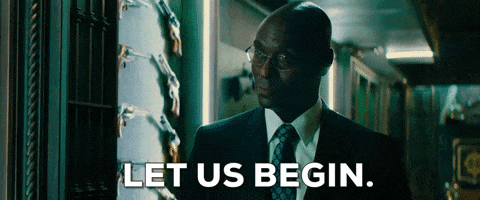

### A summary statistics on the features

In [13]:
### Descriptive analysis\
ins_claim_df.describe()

,PolicyId,ClaimId,TotalClaimAmount,CountClaim,PremiumSum,CasePremiumSum,TotalPremiumPaymentCount,PreviousInsurerExcess,PreviousInsurerPremium,IsMemberPayer,...,VehicleYear,MonthsSinceInception,DaysSinceInception,SumAssured,MeanExcess,TotalExcess,ExcessTypesCount,BaseExcess,NomimatedDriversCount,NomimatedDriversUnder30Count
count,2.629900e+05,2.747800e+04,2.739200e+04,27478.000000,262750.000000,262750.000000,262750.000000,262963.000000,262961.000000,262990.000000,...,262984.000000,134794.000000,134794.000000,220932.000000,262984.000000,262984.00000,262984.000000,262984.000000,262984.000000,262984.000000
mean,1.084961e+07,1.010507e+07,4.059307e+04,1.256787,4589.583025,3709.207406,4.623604,2923.133790,576.783245,0.966215,...,2015.281819,9.912296,301.412185,159453.781163,5333.198818,27247.58871,5.023975,4612.811216,0.546828,0.103584
std,5.172066e+04,1.506996e+04,6.521350e+04,0.574605,3538.634556,3718.507791,4.066673,6031.299346,654.862704,0.180675,...,3.892903,8.364164,254.927877,73006.555795,1713.991262,12593.85800,1.729189,2135.059052,0.725453,0.337488
min,1.076784e+07,1.007378e+07,0.000000e+00,0.000000,0.000000,0.000000,0.000000,-1.000000,-1700.000000,0.000000,...,2004.000000,-2.000000,-51.000000,30000.000000,0.000000,0.00000,1.000000,0.000000,0.000000,0.000000
25%,1.080422e+07,1.009240e+07,3.415500e+03,1.000000,1988.050000,719.137500,1.000000,0.000000,0.000000,1.000000,...,2013.000000,4.000000,117.000000,110000.000000,4210.000000,22000.00000,4.000000,4000.000000,0.000000,0.000000
50%,1.084769e+07,1.010566e+07,1.391817e+04,1.000000,3568.235000,2743.360000,4.000000,0.000000,458.000000,1.000000,...,2016.000000,7.000000,203.000000,147800.000000,5000.000000,27270.00000,6.000000,5000.000000,0.000000,0.000000
75%,1.089272e+07,1.011831e+07,4.461965e+04,1.000000,6351.192500,5620.937500,7.000000,5000.000000,1070.000000,1.000000,...,2018.000000,14.000000,434.000000,190800.000000,6196.666666,34770.00000,6.000000,5000.000000,1.000000,0.000000
max,1.095790e+07,1.012987e+07,1.754000e+06,9.000000,41822.550000,41822.550000,14.000000,800000.000000,23000.000000,1.000000,...,2022.000000,40.000000,1232.000000,515000.000000,91500.000000,129620.00000,7.000000,91500.000000,9.000000,7.000000


The dataframe above tells a brief statistical summary of all the numerical features. Like here we see that the highest count of claims made within a period of insurance coverage is 9.

### Distribution of our numerical variables

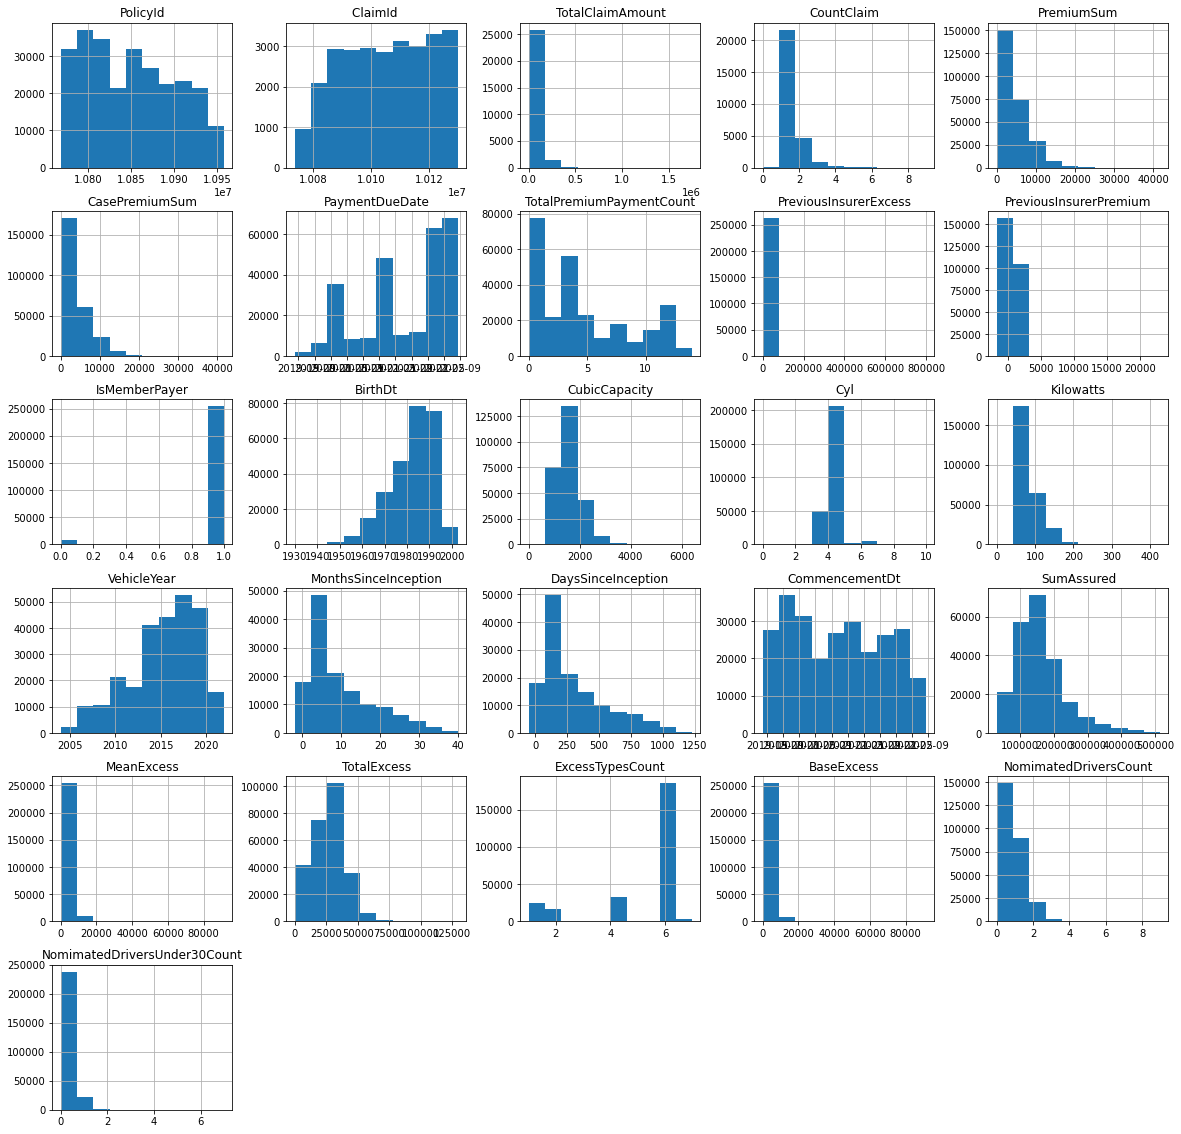

In [14]:
#plotting a histogram
ins_claim_df.hist(figsize=(20,20));

We can observed that most of these numerical features are skewed to the right. And the risk profiles with zero claims are part of this result.

### Claims made versus zero claims

Let us create a dataframe without the null values in `Totalclaimamount`. This will be a set of risk profiles that made claim.

In [15]:
# Create a datframe where there are no null values in the `sumtotalclaimamount`
ins_claim = ins_claim_df.loc[ins_claim_df['TotalClaimAmount'].notnull()]
ins_claim.head()

,PolicyId,ClaimId,TotalClaimAmount,CountClaim,PremiumSum,CasePremiumSum,PaymentDueDate,TotalPremiumPaymentCount,PreviousInsurerExcess,PreviousInsurerPremium,...,PolicyStatus,CommencementDt,PolicyEndDate,SumAssured,MeanExcess,TotalExcess,ExcessTypesCount,BaseExcess,NomimatedDriversCount,NomimatedDriversUnder30Count
15,10887037,10120994.0,47889.51,2.0,13845.40,13845.40,2022-03-31,10.0,0.0,0.0,...,Active,2021-07-21,NaN,307000.0,9120.000000,54720.0,6.0,5000.0,0.0,0.0
31,10813722,10099902.0,45504.71,1.0,15120.00,15120.00,2021-03-26,12.0,4000.0,1800.0,...,Active,2020-02-17,NaN,190000.0,6100.000000,36600.0,6.0,5000.0,0.0,0.0
33,10815078,10117504.0,95464.79,2.0,7665.96,6814.41,2022-01-25,9.0,6000.0,860.0,...,Cancelled,2020-02-26,2022-01-26 14:35:51.0313000,142000.0,5216.666666,31300.0,6.0,5000.0,0.0,0.0
35,10896202,10117731.0,163700.00,1.0,3389.15,3389.15,2022-01-22,5.0,0.0,0.0,...,Cancelled,2021-09-14,2022-02-02 14:32:33.5011000,163700.0,4561.666666,27370.0,6.0,3000.0,0.0,0.0
53,10819109,10087439.0,2126.06,1.0,6860.88,6289.14,2021-03-25,11.0,5000.0,900.0,...,Active,2020-03-26,NaN,125200.0,4086.666666,24520.0,6.0,5000.0,2.0,0.0


Another dataframe we will create here is for those that did not make claim during their period of exposure.

In [16]:
# Create a datframe where there are only null values in the `sumtotalclaimamount`
null_ins_claim = ins_claim_df.loc[ins_claim_df['TotalClaimAmount'].isnull()]
null_ins_claim.head()

,PolicyId,ClaimId,TotalClaimAmount,CountClaim,PremiumSum,CasePremiumSum,PaymentDueDate,TotalPremiumPaymentCount,PreviousInsurerExcess,PreviousInsurerPremium,...,PolicyStatus,CommencementDt,PolicyEndDate,SumAssured,MeanExcess,TotalExcess,ExcessTypesCount,BaseExcess,NomimatedDriversCount,NomimatedDriversUnder30Count
0,10806273,NaN,NaN,NaN,4915.98,4369.76,2021-12-29,8.0,0.0,0.0,...,Cancelled,2020-01-06,2021-12-29 14:46:25.4847000,45700.0,3166.666666,19000.0,6.0,1000.0,2.0,1.0
1,10822247,NaN,NaN,NaN,3342.60,668.52,2020-09-30,1.0,4500.0,900.0,...,Lapsed,2020-05-18,2020-10-16 00:00:44.0122000,113100.0,4500.000000,9000.0,2.0,5000.0,1.0,1.0
2,10941976,NaN,NaN,NaN,1762.54,1762.54,2022-07-28,3.0,0.0,808.0,...,Active,2022-05-30,NaN,92900.0,3333.333333,20000.0,6.0,1000.0,0.0,0.0
3,10782539,NaN,NaN,NaN,3723.60,3723.60,2021-08-31,5.0,0.0,0.0,...,Cancelled,2019-07-18,2021-09-25 14:09:25.7650000,173800.0,5720.000000,34320.0,6.0,5000.0,1.0,0.0
4,10916477,NaN,NaN,NaN,2478.72,0.00,2022-03-31,0.0,0.0,0.0,...,Lapsed,2022-01-10,2022-04-16 00:02:41.8644000,240200.0,6286.666666,37720.0,6.0,5000.0,0.0,0.0


Let us have a look at the proportion of those that made claims against those that did not.

In [17]:
# observing the proportion of the non-nul dataframe to the whole data
prop = (ins_claim.shape[0]/ins_claim_df.shape[0])*100
print(f'Only {round(prop, 2)}% of the insurance policies in the whole dataset were claimed')

Only 10.42% of the insurance policies in the whole dataset were claimed


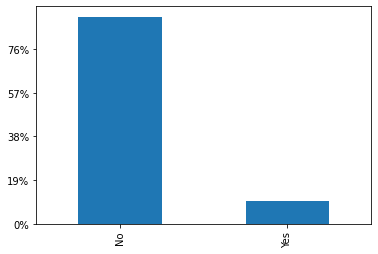

In [18]:
#visualizing claim occurence
ax = ins_claim_df['TotalClaimAmount'].fillna(0).apply(
               lambda x: ('No' if x == 0 else 'Yes')).value_counts().plot(kind='bar')
ax.yaxis.set_major_formatter(mtick.PercentFormatter(ins_claim_df.shape[0]))

The sole purpose of insurance is for protection or loss reduction against unforseen accidents or peril. 
No one wishes to encounter accident or huge loss from damages.  
And They wouldnt want to start looking for a way to get their money back from the insurance company before policy agreement expires.

This graph can also tell that the policyholders are safe drivers and have very low exposure to risk.

...

Let us plot a graph to show the distribution of the `TotalClaimAmount`. There will be two graphs; one will display the TotalClaimAmount with the no(null)claims included. And the other will the display the TotalClaimAmount excluding the no(null)claims.

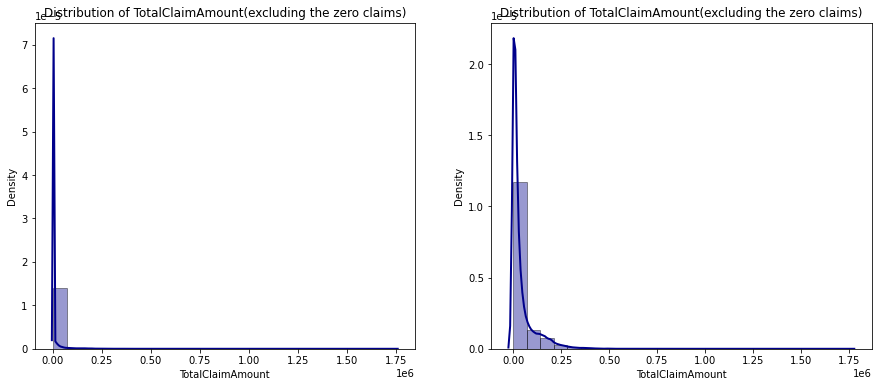

In [19]:
#create normal distribution curve
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
sns.distplot(ins_claim_df['TotalClaimAmount'].fillna(0), hist=True, kde=True, 
             color = 'darkblue', bins=25,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2}, ax=axes[0]).set(title='Distribution of TotalClaimAmount(excluding the zero claims)')

sns.distplot(ins_claim['TotalClaimAmount'], hist=True, kde=True, 
             color = 'darkblue', bins=25, 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2}, ax=axes[1]).set(title='Distribution of TotalClaimAmount(excluding the zero claims)');

We can notice here that the distribution of our target variable is skewed to the right. This is as a result of so many zero claims.

### Insured/Policyholders who made claims and the number of times they made claim within their policy duration. 

Some risk profiles can encounter accidents more than one time within their period of exposure. These are high risk profiles. 

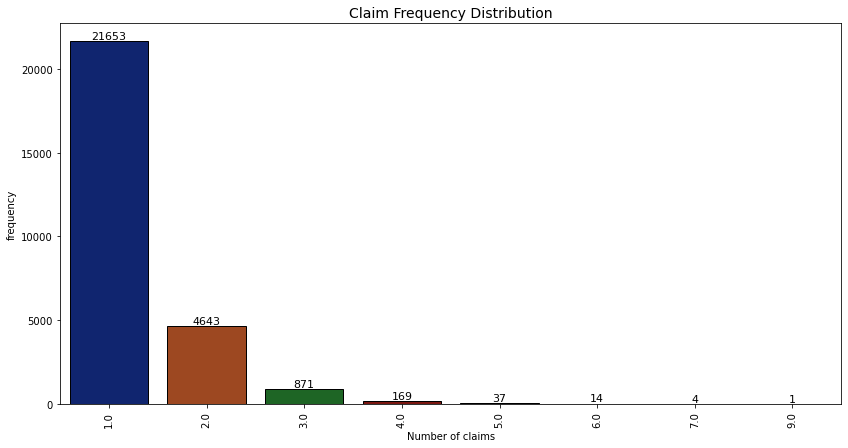

In [20]:
# visualizing the claim count
# creating a function to plot a bar chart 
def most_claim_count(df,column):
    #remove all the zero values
    df = df[df.CountClaim != 0.0]
    #plotting graph
    plt.figure(figsize=(14,7))
    data = df[str(column)].value_counts()
    ax = sns.barplot(x = data.index, y = data, order= data.index, palette='dark', edgecolor="black")
    for p in ax.patches:
        ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
                fontsize=11, ha='center', va='bottom')
    plt.title('Claim Frequency Distribution', fontsize=14)
    plt.xlabel('Number of claims')
    plt.ylabel('frequency')
    plt.xticks(rotation=90)
    plt.show()

# Call Function
most_claim_count(ins_claim,'CountClaim')

The majority here is just a one time claim which is normal. The disturbing one is the riskprofile with 9 counts of claims within a period of exposure. Followed by the ones of 7 and 6.  
Let us take a peek at these risk profiles.

In [21]:
profiles = ins_claim_df[ins_claim_df.CountClaim > 5.0]
profiles[['Gender', 'CountClaim', 'TotalClaimAmount', 'BirthDt', 'CommencementDt', 
          'PolicyEndDate', 'Model', 'VehicleYear', 'BodyType']].sort_values(
    by=['CountClaim'], ascending=False)

,Gender,CountClaim,TotalClaimAmount,BirthDt,CommencementDt,PolicyEndDate,Model,VehicleYear,BodyType
124227,Male,9.0,344125.25,1985-06-01,2019-10-23,2022-04-04 15:04:30.2996000,COROLLA 1.3 PRESTIGE,2018.0,S/D
181944,Male,7.0,96122.02,1987-06-05,2021-03-02,2022-02-03 15:05:37.6269000,A5 1.8TFSI MULTI,2016.0,C/P
83842,Male,7.0,30265.67,1983-12-08,2019-04-18,NaN,POLO VIVO 1.4 TRENDLINE (5DR),2019.0,H/B
84853,Male,7.0,152425.01,1989-03-25,2020-03-11,NaN,316i A/T (F30),2014.0,S/D
94975,Female,7.0,53159.23,1981-10-30,2021-02-12,NaN,GO 1.2 LUX,2015.0,H/B
12578,Male,6.0,22870.85,1986-04-09,2019-10-28,2021-11-30 00:02:11.8270000,CLIO IV 900 T EXPRESSION 5DR (66KW),2013.0,H/B
211912,Male,6.0,95805.36,1987-04-23,2019-08-05,NaN,POLO VIVO 1.4 TRENDLINE (5DR),2018.0,H/B
166620,Male,6.0,492014.64,1990-01-08,2020-03-10,2021-12-21 16:45:14.2424000,POLO 2.0 GTI DSG (147KW),2020.0,H/B
165992,Male,6.0,118873.82,1993-03-20,2020-07-22,NaN,GRAND i10 1.25 FLUID,2018.0,H/B
163760,Male,6.0,112628.36,1985-03-22,2020-02-24,NaN,320i SPORT LINE A/T (F30),2012.0,S/D


If we take a closer look at this dataframe, we can see that only 5 female policyholders can be seen in this high count of claims. 

Calculating from 2022, majority of these policyholders are in their thirties(Young drivers). We will create an `Age` feature as we go on in this project.

If we take another look at the top two claims, we discover that the risk profile with 9 count of claims had a policy duration of about 2 and a half years (from October 2019 - April 2022) with a total claim amount of 344,125 Rands and the other with 7 counts of claims was only insured for a policy duration of 1 year (March 2021 - February 2022) with a total claim amount of 96,122.

Also, looking at the `VehicleYear`, we can say that these cars are definately not old.

**Insight:**
One thing we can take from all these is that policyholders of high risk exposure are mostly young and drive new cars.

### Checking for correlations among the features

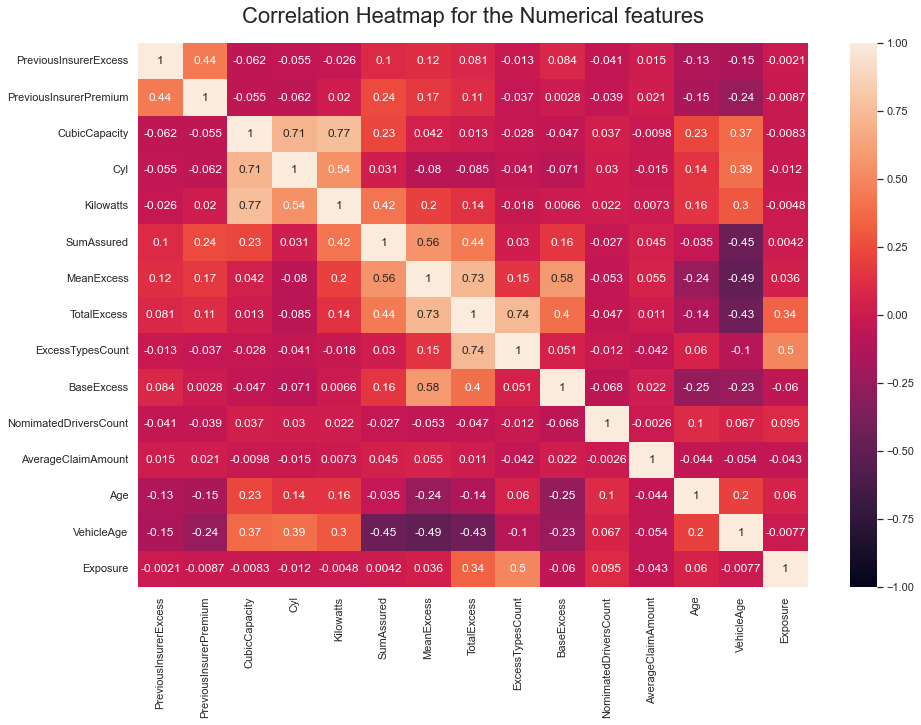

In [158]:
# evaluate correlation
#plotting a heat map to check the level of correlation between the numerical features
heatmap = sns.heatmap(ins_claim_df.corr(), vmin=-1, vmax=1, annot=True)
sns.set(rc = {'figure.figsize':(20, 15)})
heatmap.set_title('Correlation Heatmap for the Numerical features', fontdict={'fontsize':22}, pad=20);

With high positive relation being 1.0 and high negative relation being -1.0, there seem to be no correlation between the `TotalClaimAmount` and(even among) these numerical features in the dataset except for `premiumsum` and `casepremiumsum` and `cyl` having little positive correlation with `CubicCapacity` and `Kilowatts`. And little corellation between `meanexcess`, `totalexcess` and `excesstypecount`.

### The gender Frequency   

From our previous exploration, we noticed that male policyholders made more claims thans female from the top count of claims.
Let us dive in deeper into this `Gender` to observe the proportion of males that made claims from the whole males in the dataset and the proportion of females from all the females in our dataset.

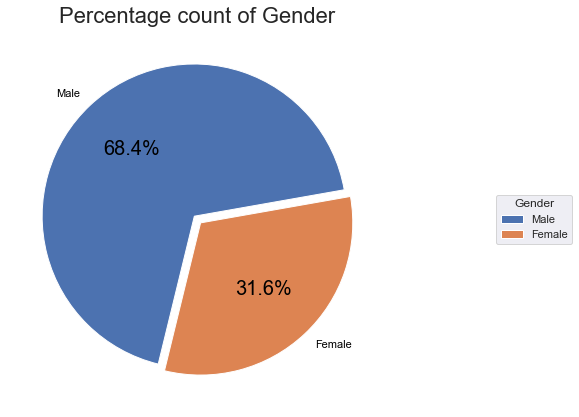

In [23]:
# creating lists for gender and counts
gen_freq = list(ins_claim['Gender'].value_counts())
gen = list(ins_claim['Gender'].unique())
# Plotting the pie chart to count the percentage of  
# each gender of the dataset on the above dataframe

explode = (0.03, 0.03)

# Creating autocpt arguments
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%".format(pct, absolute)
 
# Creating plot
fig, ax = plt.subplots(figsize =(10, 7))
wedges, texts, autotexts = ax.pie(gen_freq,
                                  autopct = lambda pct: func(pct, gen_freq),
                                  explode = explode,
                                  labels = gen,
                                  startangle = 10,
                                  textprops = dict(color ="black"))
# Adding legend
ax.legend(wedges, gen,
          title ="Gender",
          loc ="right",
          bbox_to_anchor =(1, 0, 0.5, 1))
 
plt.setp(autotexts, size = 20, weight ="light")
ax.set_title("Percentage count of Gender", fontdict={'fontsize':22})
# show plot
plt.show()

As seen above, the Males made more claims than females. It is however clear that the males tend to insure their vehicles more than females.

In [24]:
no_claim_m = null_ins_claim['Gender'].value_counts()['Male']
no_claim_f = null_ins_claim['Gender'].value_counts()['Female']
claim_m = ins_claim['Gender'].value_counts()['Male']
claim_f = ins_claim['Gender'].value_counts()['Female']
tot_m = ins_claim_df['Gender'].value_counts()['Male']
tot_f = ins_claim_df['Gender'].value_counts()['Female']
perc_claim_m = ins_claim['Gender'].value_counts()['Male'] / ins_claim_df['Gender'].value_counts()['Male'] * 100
perc_claim_f = ins_claim['Gender'].value_counts()['Female'] / ins_claim_df['Gender'].value_counts()['Female'] * 100
perc_noclaim_m = null_ins_claim['Gender'].value_counts()['Male'] / ins_claim_df['Gender'].value_counts()['Male'] * 100
perc_noclaim_f = null_ins_claim['Gender'].value_counts()['Female'] / ins_claim_df['Gender'].value_counts()['Female'] * 100

gender_data = {'Gender': ['Male', 'Female'], 
            'Claims':[claim_m, claim_f], 
            'No Claims':[no_claim_m, no_claim_f], 
            'Total':[tot_m, tot_f], 
              'Claims %':[round(perc_claim_m, 2), round(perc_claim_f, 2)], 
              'No Claims %':[round(perc_noclaim_m, 2), round(perc_noclaim_f, 2)]}
gender_data = pd.DataFrame(gender_data)
gender_data

,Gender,Claims,No Claims,Total,Claims %,No Claims %
0,Male,18739,152943,171682,10.91,89.09
1,Female,8653,82647,91300,9.48,90.52


From the dataframe above, it can be seen that about 11% of males made claims and 9% of females made claims. They are almost of the same proportion.
**Insights**    
Males tend to insure their vehicles more than the females.
But Both Male and Female can have a high exposure to risk.

### Occupation of policy holders that makes the most claims

There are occupations that involves frequent driving on the road or highway. These vehicles are more exposed to risk or accident.      

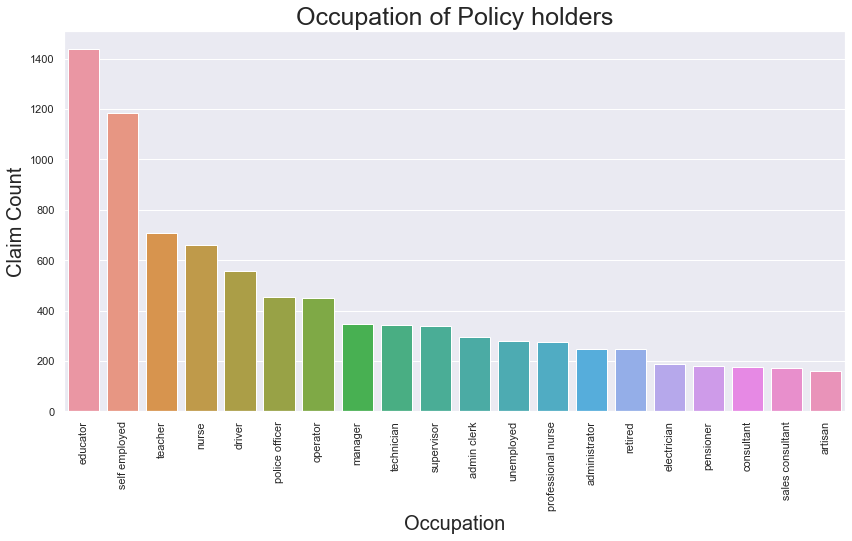

In [25]:
#converting the occupation column to lowercase
ins_claim['Occupation'] = ins_claim['Occupation'].str.lower()
#replacing special charatcer'-' with space
ins_claim['Occupation'] = ins_claim['Occupation'].replace(to_replace ='-', value = ' ', regex = True)
  
# drop claims without occupation and plotting a bar chart
ins_claim = ins_claim[ins_claim.Occupation != 'nan']
fig, ax = plt.subplots(figsize=(14, 7))
sns.countplot(x='Occupation', data=ins_claim, 
              order=ins_claim['Occupation'].value_counts(ascending=False).head(20).index)
plt.xticks(rotation=90)
plt.xlabel('Occupation', size=20)
plt.ylabel('Claim Count', size=20)
plt.title('Occupation of Policy holders', size=25)
plt.show()

Although We may be expecting to see 'driver' as the general occupation of policyholders that make most claims, Educators and teachers could be understandable(maybe driving to and from Institutions everyday).
Self-employed could also convey self-employed taxi drivers. 

### Occupation of zero-claims policy holders

Let us observe here the major occupation of policyholders that did not make claims within their policy duration.

In [26]:
#converting the occupation column to lowercase
null_ins_claim['Occupation'] = null_ins_claim['Occupation'].str.lower()
#replacing special charatcer'-' with space
null_ins_claim['Occupation'] = null_ins_claim['Occupation'].replace(to_replace ='-', value = ' ', regex = True)

#view as dataframe
null_count = pd.DataFrame(list(null_ins_claim['Occupation'].value_counts()),
                          null_ins_claim['Occupation'].dropna().unique(),
                          columns=['no_claim_count'])

null_count.head()

,no_claim_count
human resource consultant,12827
sale rep,12354
safety officer,6589
cic support engineer,6028
correctional officer,5542


Let us visualise this information in a bar chart.

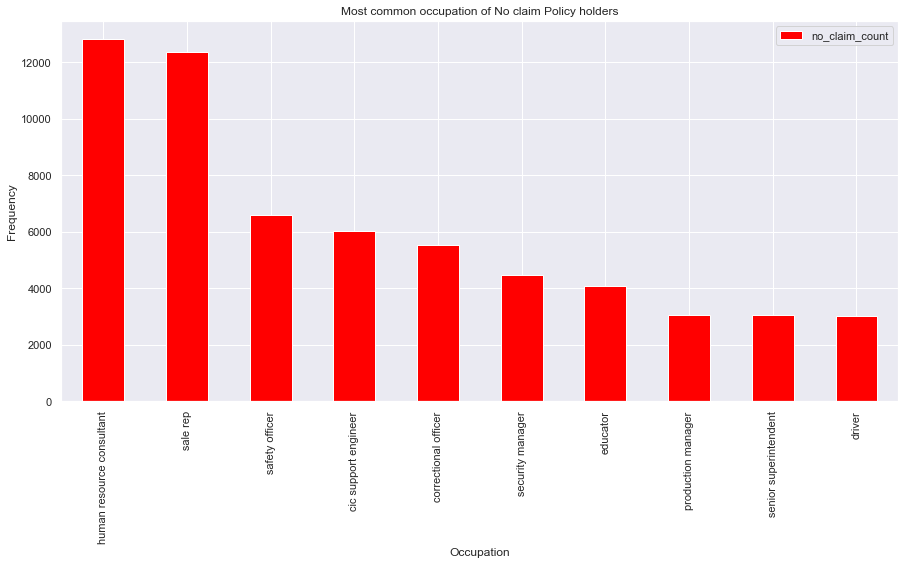

In [27]:
null_count.sort_values(by=['no_claim_count'], ascending=False).head(10).plot(
    use_index=True, y='no_claim_count', kind="bar", color= 'red', xlabel='Occupation',
    ylabel='Frequency', title='Most common occupation of No claim Policy holders', figsize=(15, 7));

Here we can see the occupations of our low risk profilers. Human resource consultants happen to be the highest.
- Saftey Officers happens to be on the top 3. They lead by example.

### Checking the age of the policyholders who made claims 

Here, I will create a column that calculates the age of the policyholder who made claims. Let us see if we can prove that younger policyholder tend to be more exposed to risk.

In [28]:
# This function converts given date to age
def age(born):
    born = datetime.strptime(born, "%Y-%m-%d").date()
    today = date.today()
    return today.year - born.year - ((today.month, 
                                      today.day) < (born.month, 
                                                    born.day))


In [29]:
# creating age column from the function
ins_claim['Age'] = ins_claim['BirthDt'].astype('str').apply(age)

In [30]:
ins_claim.head()

,PolicyId,ClaimId,TotalClaimAmount,CountClaim,PremiumSum,CasePremiumSum,PaymentDueDate,TotalPremiumPaymentCount,PreviousInsurerExcess,PreviousInsurerPremium,...,CommencementDt,PolicyEndDate,SumAssured,MeanExcess,TotalExcess,ExcessTypesCount,BaseExcess,NomimatedDriversCount,NomimatedDriversUnder30Count,Age
15,10887037,10120994.0,47889.51,2.0,13845.40,13845.40,2022-03-31,10.0,0.0,0.0,...,2021-07-21,NaN,307000.0,9120.000000,54720.0,6.0,5000.0,0.0,0.0,31
31,10813722,10099902.0,45504.71,1.0,15120.00,15120.00,2021-03-26,12.0,4000.0,1800.0,...,2020-02-17,NaN,190000.0,6100.000000,36600.0,6.0,5000.0,0.0,0.0,33
33,10815078,10117504.0,95464.79,2.0,7665.96,6814.41,2022-01-25,9.0,6000.0,860.0,...,2020-02-26,2022-01-26 14:35:51.0313000,142000.0,5216.666666,31300.0,6.0,5000.0,0.0,0.0,25
35,10896202,10117731.0,163700.00,1.0,3389.15,3389.15,2022-01-22,5.0,0.0,0.0,...,2021-09-14,2022-02-02 14:32:33.5011000,163700.0,4561.666666,27370.0,6.0,3000.0,0.0,0.0,50
53,10819109,10087439.0,2126.06,1.0,6860.88,6289.14,2021-03-25,11.0,5000.0,900.0,...,2020-03-26,NaN,125200.0,4086.666666,24520.0,6.0,5000.0,2.0,0.0,58


### Age Category

In [31]:
#adding temporary columns for counting PD
ins_claim['AgeRange'] = ins_claim.Age.apply(
               lambda x: ('16 - 25years' if x <= 25 else ('26 - 35years' if x <= 35 else (
               '36 - 45years' if x <= 45 else (
               '46 - 55years' if x <= 55 else (
               '56 - 65years' if x <= 65 else '66years and Above'))))))

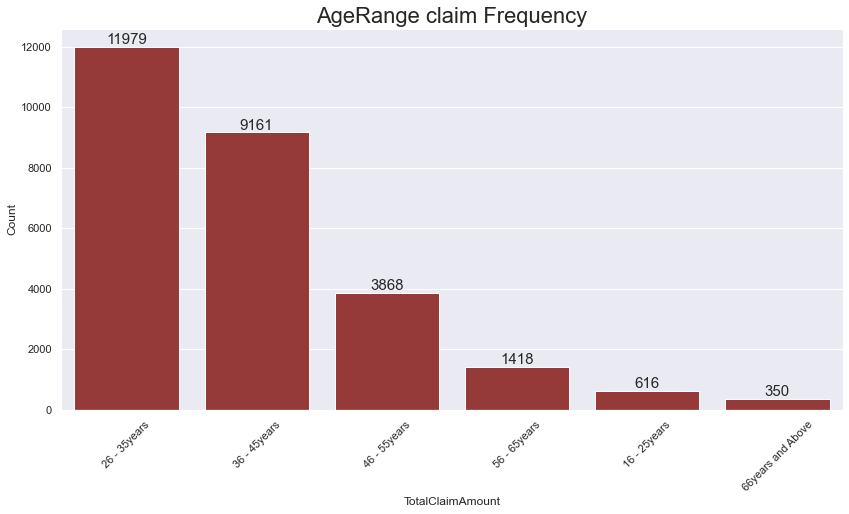

In [32]:
def top_rating_plot(df,column, n):
    #plotting graph
    plt.figure(figsize=(14,7))
    data = df[str(column)].value_counts().head(n)
    ax = sns.barplot(x = data.index, y = data, order= data.index, color='brown')
    for p in ax.patches:
        ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
                fontsize=15, ha='center', va='bottom')
    plt.title('AgeRange claim Frequency', fontsize=22)
    plt.xlabel('TotalClaimAmount')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

top_rating_plot(ins_claim,'AgeRange',10)

It looks like we were right about the younger ones being 'fast and furious'.

### Vehicle body type versus claims made

Let us visualise the vehicle bodytype that frequently makes claims.

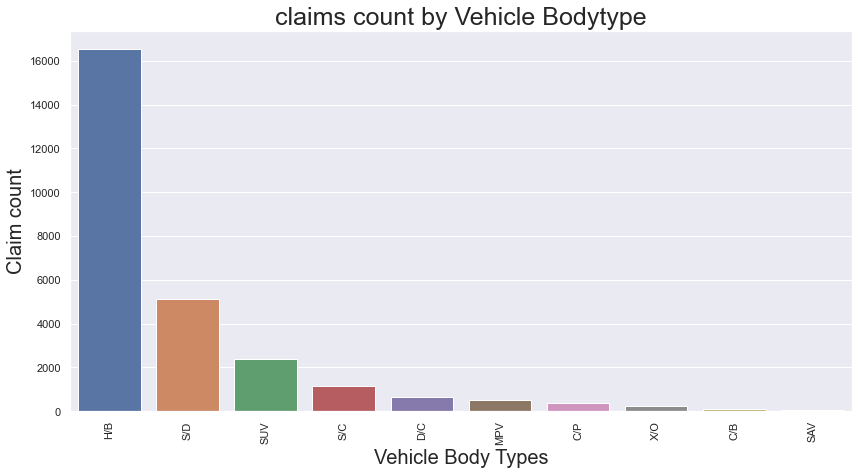

In [33]:
#plotting bar chart for body type
fig, ax = plt.subplots(figsize=(14, 7))
sns.countplot(x='BodyType', data=ins_claim, 
              order=ins_claim['BodyType'].value_counts(ascending=False).head(10).index)
plt.xticks(rotation=90)
plt.xlabel('Vehicle Body Types', size=20)
plt.ylabel('Claim count', size=20)
plt.title('claims count by Vehicle Bodytype', size=25)
plt.show()

If we could recall back at the exploration of the policyholders with high count of claims, they were mostly H/B(Hatch Back).
Vehicle bodytype maybe something to consider in risk exposure.

Looking at the most frequent 6 vehicle bodytype, we have:     
H/B -- Hatchback     
S/D -- Sedan     
SUV -- Sport Utility Vehicle     
S/C -- Saloon Car     
D/C -- Design Cars     
MPV -- Multi-Purpose Vehicle     
Majority of the vehicle bodytype are HatchBack. Therefore, vehicle bodytype is a factor to be considered in risk exposure.

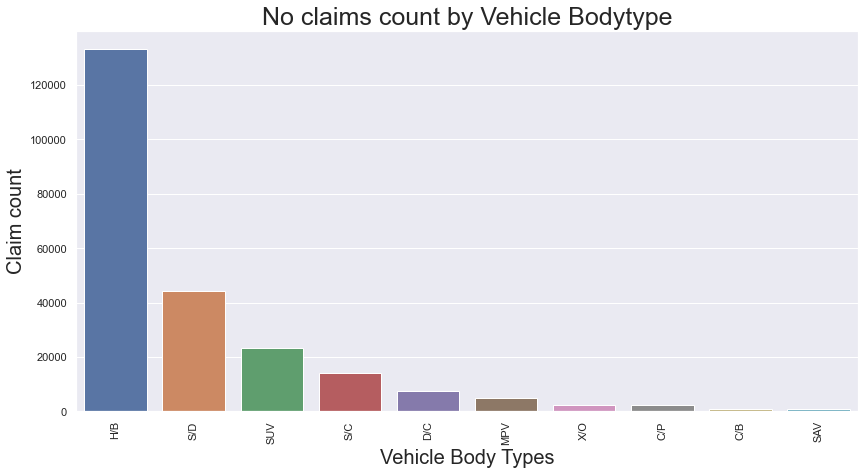

In [34]:
# plotting bar chart for body type
fig, ax = plt.subplots(figsize=(14, 7))
sns.countplot(x='BodyType', data=null_ins_claim, 
              order=null_ins_claim['BodyType'].value_counts(ascending=False).head(10).index)
plt.xticks(rotation=90)
plt.xlabel('Vehicle Body Types', size=20)
plt.ylabel('Claim count', size=20)
plt.title('No claims count by Vehicle Bodytype', size=25)
plt.show()

From the claims and no-claims visualization, we can see here that HatchBack is the most popular insured vehicle.

In [35]:
hb_vehs = ins_claim_df[ins_claim_df.BodyType == 'H/B'].shape[0]
print(f'The total HatchBack Vehicles insured is {hb_vehs}')
# observing the proportion of the non-nul dataframe to the whole data
prop = (ins_claim[ins_claim.BodyType == 'H/B'].shape[0]/ins_claim_df[ins_claim_df.BodyType == 'H/B'].shape[0])*100
print(f' {round(prop, 2)}% of policyholders with HatchBack Vehicles made claims')

The total HatchBack Vehicles insured is 149785
 11.04% of policyholders with HatchBack Vehicles made claims


...

### Vehicle Age versus Claim count

Let us view the age of vehicles of insured that made claims most times. 

In [36]:
# function to subtract curent year from vehicle Age
def vehicleAge(veh_year):
    return 2022 - veh_year

In [37]:
# creating age column from the function
null_ins_claim['VehicleAge'] = null_ins_claim['VehicleYear'].apply(vehicleAge)
ins_claim['VehicleAge'] = ins_claim['VehicleYear'].apply(vehicleAge).astype(int)

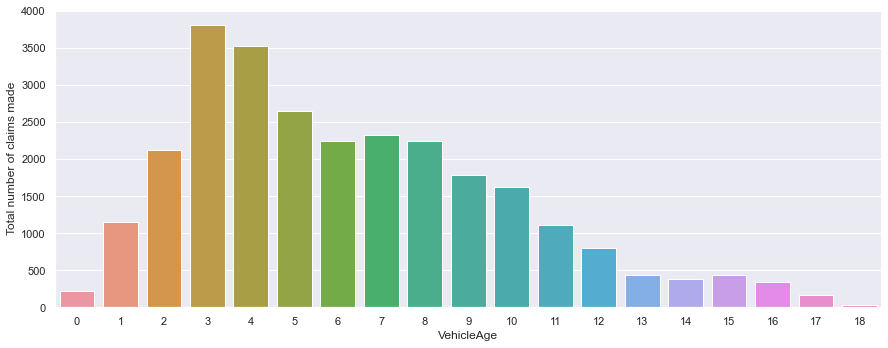

In [38]:
# visualizing the age of insured vehicles by claims made
with sns.axes_style('darkgrid'):
    g = sns.catplot("VehicleAge", data=ins_claim, aspect=2.5, kind='count')
    g.set_ylabels(" Total number of claims made");

As previously observed in our exploratory, newer cars between 3-5 years make claims the most. 

### How much (in Rands) is being claimed mostly?

Here, we will categorized the total claim amount and have a visual of the amount mostly claimed within policy duration.

In [39]:
#adding temporary columns for counting PD
ins_claim['ClaimAmountRange'] = ins_claim.TotalClaimAmount.apply(
               lambda x: ('R1 - R10k' if x < 11000  else ('R11k - R50k' if x < 50999.99 else (
               'R51k - R100k' if x < 100999.99 else (
               'R101k - R500k' if x < 500999.99 else (
               'R501k - R1m' if x < 1000999.99 else 'R1m and Above'))))))

In [40]:
ins_claim['ClaimAmountRange'].value_counts()

R1 - R10k        12419
R11k - R50k       8793
R101k - R500k     3562
R51k - R100k      2607
R501k - R1m         10
R1m and Above        1
Name: ClaimAmountRange, dtype: int64

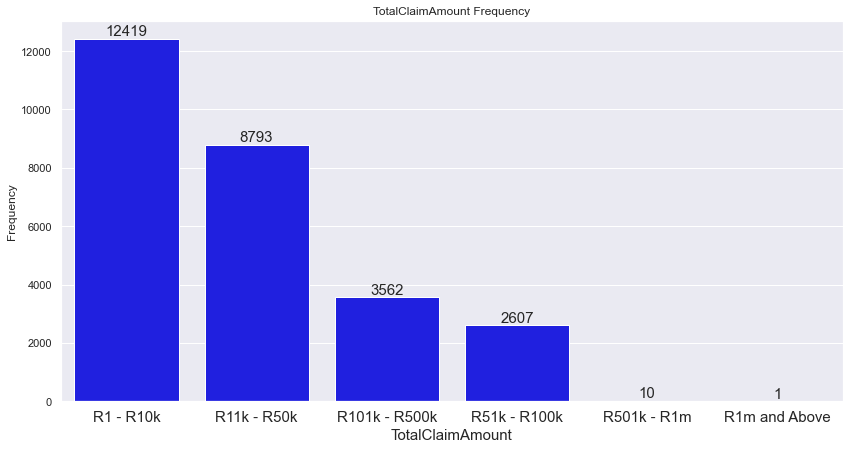

In [41]:
def top_rating_plot(df,column, n):
    #plotting graph
    plt.figure(figsize=(14,7))
    data = df[str(column)].value_counts().head(n)
    ax = sns.barplot(x = data.index, y = data, order= data.index, color='blue')
    for p in ax.patches:
        ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
                fontsize=15, ha='center', va='bottom')
    plt.title('TotalClaimAmount Frequency', fontsize=12)
    plt.xlabel('TotalClaimAmount', fontsize=15)
    plt.ylabel('Frequency')
    plt.xticks(rotation=0, size=15 )
    plt.show()

top_rating_plot(ins_claim,'ClaimAmountRange',10)

Between 1 - 10,000 Rand is mostly claimed.

### In what province do we experience more claims?

With a pie chart, let us take a look at the provinces in South Africa where claims mostly made.

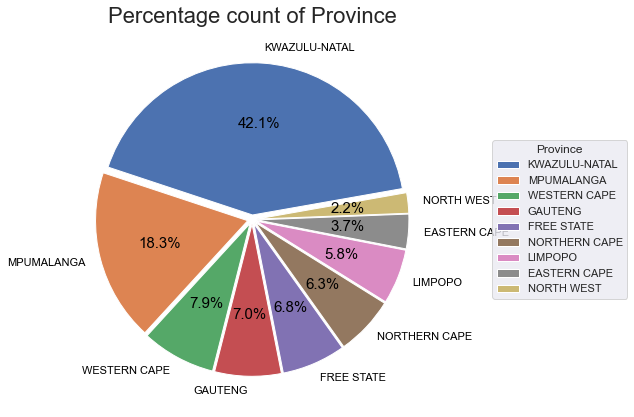

In [42]:
# creating lists for gender and counts
gen_freq = list(ins_claim['PersonProvince'].value_counts())
gen = list(ins_claim['PersonProvince'].unique())
# Plotting the pie chart to count the percentage of  
# each gender of the dataset on the above dataframe

explode = (0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03)

# Creating autocpt arguments
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%".format(pct, absolute)
 
# Creating plot
fig, ax = plt.subplots(figsize =(10, 7))
wedges, texts, autotexts = ax.pie(gen_freq,
                                  autopct = lambda pct: func(pct, gen_freq),
                                  labels = gen,
                                  explode = explode,
                                  startangle = 10,
                                  textprops = dict(color ="black"))
# Adding legend
ax.legend(wedges, gen,
          title ="Province",
          loc ="right",
          bbox_to_anchor =(1, 0, 0.5, 1))
 
plt.setp(autotexts, size = 15, weight ="light")
ax.set_title("Percentage count of Province", fontdict={'fontsize':22})
# show plot
plt.show()

Seeing that KWAZULU-NATAL has the largest percentage. It could be that the province contains high traffice areas.


...

Like we did for `Gender` let u

In [43]:
# calculating the proportion of provinces with claims and zero claims
no_claim_kwa = null_ins_claim['PersonProvince'].value_counts()['KWAZULU-NATAL']
no_claim_mpu = null_ins_claim['PersonProvince'].value_counts()['MPUMALANGA']
no_claim_wes = null_ins_claim['PersonProvince'].value_counts()['WESTERN CAPE']
no_claim_gau = null_ins_claim['PersonProvince'].value_counts()['GAUTENG']
no_claim_fre = null_ins_claim['PersonProvince'].value_counts()['FREE STATE']
no_claim_nor = null_ins_claim['PersonProvince'].value_counts()['NORTHERN CAPE']
no_claim_lim = null_ins_claim['PersonProvince'].value_counts()['LIMPOPO']
no_claim_eas = null_ins_claim['PersonProvince'].value_counts()['EASTERN CAPE']
no_claim_nowe = null_ins_claim['PersonProvince'].value_counts()['NORTH WEST']

claim_kwa = ins_claim['PersonProvince'].value_counts()['KWAZULU-NATAL']
claim_mpu = ins_claim['PersonProvince'].value_counts()['MPUMALANGA']
claim_wes = ins_claim['PersonProvince'].value_counts()['WESTERN CAPE']
claim_gau = ins_claim['PersonProvince'].value_counts()['GAUTENG']
claim_fre = ins_claim['PersonProvince'].value_counts()['FREE STATE']
claim_nor = ins_claim['PersonProvince'].value_counts()['NORTHERN CAPE']
claim_lim = ins_claim['PersonProvince'].value_counts()['LIMPOPO']
claim_eas = ins_claim['PersonProvince'].value_counts()['EASTERN CAPE']
claim_nowe = ins_claim['PersonProvince'].value_counts()['NORTH WEST']

tot_kwa = ins_claim_df['PersonProvince'].value_counts()['KWAZULU-NATAL']
tot_mpu = ins_claim_df['PersonProvince'].value_counts()['MPUMALANGA']
tot_wes = ins_claim_df['PersonProvince'].value_counts()['WESTERN CAPE']
tot_gau = ins_claim_df['PersonProvince'].value_counts()['GAUTENG']
tot_fre = ins_claim_df['PersonProvince'].value_counts()['FREE STATE']
tot_nor = ins_claim_df['PersonProvince'].value_counts()['NORTHERN CAPE']
tot_lim = ins_claim_df['PersonProvince'].value_counts()['LIMPOPO']
tot_eas = ins_claim_df['PersonProvince'].value_counts()['EASTERN CAPE']
tot_nowe = ins_claim_df['PersonProvince'].value_counts()['NORTH WEST']

perc_claim_kwa = ins_claim['PersonProvince'].value_counts()['KWAZULU-NATAL'] / ins_claim_df['PersonProvince'].value_counts()['KWAZULU-NATAL'] * 100
perc_claim_mpu = ins_claim['PersonProvince'].value_counts()['MPUMALANGA'] / ins_claim_df['PersonProvince'].value_counts()['MPUMALANGA'] * 100
perc_claim_wes = ins_claim['PersonProvince'].value_counts()['WESTERN CAPE'] / ins_claim_df['PersonProvince'].value_counts()['WESTERN CAPE'] * 100
perc_claim_gau = ins_claim['PersonProvince'].value_counts()['GAUTENG'] / ins_claim_df['PersonProvince'].value_counts()['GAUTENG'] * 100
perc_claim_fre = ins_claim['PersonProvince'].value_counts()['FREE STATE'] / ins_claim_df['PersonProvince'].value_counts()['FREE STATE'] * 100
perc_claim_nor = ins_claim['PersonProvince'].value_counts()['NORTHERN CAPE'] / ins_claim_df['PersonProvince'].value_counts()['NORTHERN CAPE'] * 100
perc_claim_lim = ins_claim['PersonProvince'].value_counts()['LIMPOPO'] / ins_claim_df['PersonProvince'].value_counts()['LIMPOPO'] * 100
perc_claim_eas = ins_claim['PersonProvince'].value_counts()['EASTERN CAPE'] / ins_claim_df['PersonProvince'].value_counts()['EASTERN CAPE'] * 100
perc_claim_nowe = ins_claim['PersonProvince'].value_counts()['NORTH WEST'] / ins_claim_df['PersonProvince'].value_counts()['NORTH WEST'] * 100

perc_noclaim_kwa = null_ins_claim['PersonProvince'].value_counts()['KWAZULU-NATAL'] / ins_claim_df['PersonProvince'].value_counts()['KWAZULU-NATAL'] * 100
perc_noclaim_mpu = null_ins_claim['PersonProvince'].value_counts()['MPUMALANGA'] / ins_claim_df['PersonProvince'].value_counts()['MPUMALANGA'] * 100
perc_noclaim_wes = null_ins_claim['PersonProvince'].value_counts()['WESTERN CAPE'] / ins_claim_df['PersonProvince'].value_counts()['WESTERN CAPE'] * 100
perc_noclaim_gau = null_ins_claim['PersonProvince'].value_counts()['GAUTENG'] / ins_claim_df['PersonProvince'].value_counts()['GAUTENG'] * 100
perc_noclaim_fre = null_ins_claim['PersonProvince'].value_counts()['FREE STATE'] / ins_claim_df['PersonProvince'].value_counts()['FREE STATE'] * 100
perc_noclaim_nor = null_ins_claim['PersonProvince'].value_counts()['NORTHERN CAPE'] / ins_claim_df['PersonProvince'].value_counts()['NORTHERN CAPE'] * 100
perc_noclaim_lim = null_ins_claim['PersonProvince'].value_counts()['LIMPOPO'] / ins_claim_df['PersonProvince'].value_counts()['LIMPOPO'] * 100
perc_noclaim_eas = null_ins_claim['PersonProvince'].value_counts()['EASTERN CAPE'] / ins_claim_df['PersonProvince'].value_counts()['EASTERN CAPE'] * 100
perc_noclaim_nowe = null_ins_claim['PersonProvince'].value_counts()['NORTH WEST'] / ins_claim_df['PersonProvince'].value_counts()['NORTH WEST'] * 100

In [44]:
location_data = {'Province': ['KWAZULU-NATAL', 'MPUMALANGA', 'WESTERN CAPE', 'GAUTENG', 
                          'FREE STATE', 'NORTHERN CAPE', 'LIMPOPO', 'EASTERN CAPE', 
                          'NORTH WEST'], 
                 'Claims':[claim_kwa, claim_mpu, claim_wes, claim_gau, claim_fre, 
                      claim_nor, claim_lim, claim_eas, claim_nowe], 
                 'No Claims':[no_claim_kwa, no_claim_mpu, no_claim_wes, no_claim_gau, 
                         no_claim_fre, no_claim_nor, no_claim_lim, no_claim_eas, no_claim_nowe], 
                 'Total':[tot_kwa, tot_mpu, tot_wes, tot_gau, 
                     tot_fre, tot_nor, tot_lim, tot_eas, tot_nowe], 
                 'Claims %':[round(perc_claim_kwa, 2), round(perc_claim_mpu, 2), 
                          round(perc_claim_wes, 2), round(perc_claim_gau, 2), 
                          round(perc_claim_fre, 2), round(perc_claim_nor, 2), 
                          round(perc_claim_lim, 2), round(perc_claim_eas, 2), round(perc_claim_nowe, 2)], 
                 'No Claims %':[round(perc_noclaim_kwa, 2), round(perc_noclaim_mpu, 2), 
                          round(perc_noclaim_wes, 2), round(perc_noclaim_gau, 2), 
                          round(perc_noclaim_fre, 2), round(perc_noclaim_nor, 2), 
                          round(perc_noclaim_lim, 2), round(perc_noclaim_eas, 2), round(perc_noclaim_nowe, 2)]}
location_data = pd.DataFrame(location_data)
location_data.sort_values(by=['Total'], ascending=False)

,Province,Claims,No Claims,Total,Claims %,No Claims %
3,GAUTENG,11540,96448,107988,10.69,89.31
0,KWAZULU-NATAL,5006,42485,47491,10.54,89.46
1,MPUMALANGA,1931,18076,20007,9.65,90.35
7,EASTERN CAPE,2153,17074,19227,11.20,88.80
6,LIMPOPO,1851,17342,19193,9.64,90.36
2,WESTERN CAPE,1718,15584,17302,9.93,90.07
8,NORTH WEST,1595,14319,15914,10.02,89.98
4,FREE STATE,1004,9543,10547,9.52,90.48
5,NORTHERN CAPE,594,4721,5315,11.18,88.82


Only a very small percentage of these province from their total in the datset make claims.

...

#### Count of claims on Policy Status and Vehicle types

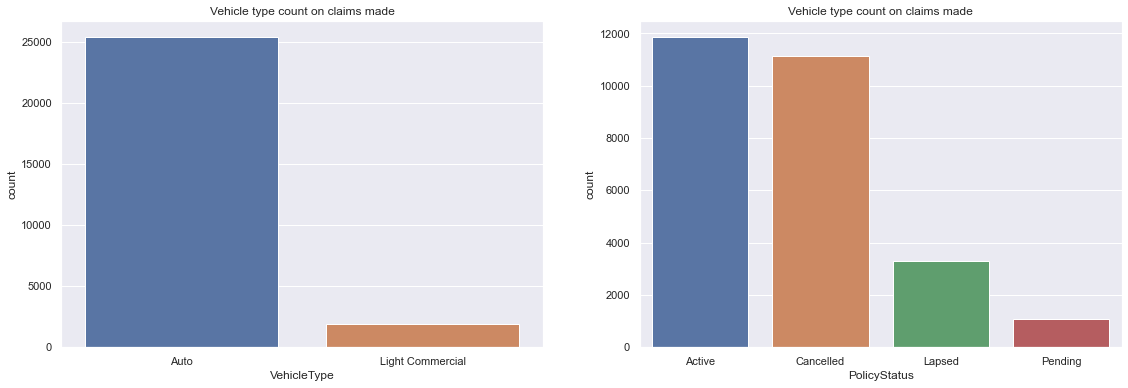

In [45]:
fig, (ax1, ax2) = plt.subplots(ncols=2)
fig.set_size_inches(19,6)
g = sns.countplot(x='VehicleType',data=ins_claim.sort_values('VehicleType'), ax=ax1)
title = g.set_title('Vehicle type count on claims made')
g = sns.countplot(x='PolicyStatus',data=ins_claim.sort_values('PolicyStatus'), ax=ax2)
title = g.set_title('Vehicle type count on claims made')

### Other valued features and their impact on Total claim amount

Let us visualise some useful categorical features based on Total Claim Amount.

''

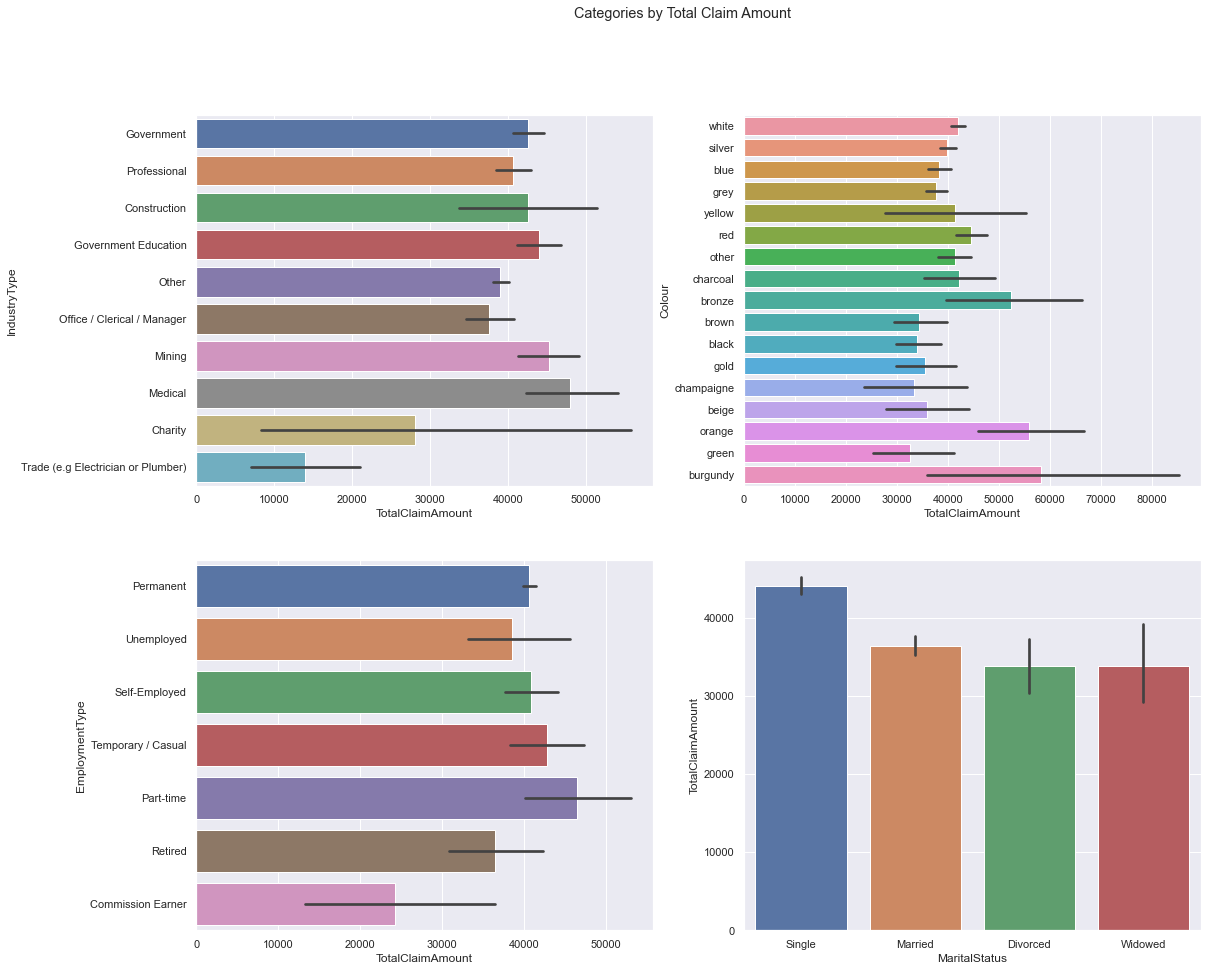

In [46]:
fig, axes = plt.subplots(2, 2, figsize=(18, 15))
fig.suptitle('Categories by Total Claim Amount')
sns.barplot(ax=axes[0, 0], data=ins_claim, x='TotalClaimAmount', y='IndustryType')
sns.barplot(ax=axes[0, 1], data=ins_claim, x='TotalClaimAmount', y='Colour')
sns.barplot(ax=axes[1, 0], data=ins_claim, x='TotalClaimAmount', y='EmploymentType')
sns.barplot(ax=axes[1, 1], data=ins_claim, x='MaritalStatus', y='TotalClaimAmount')
;

...

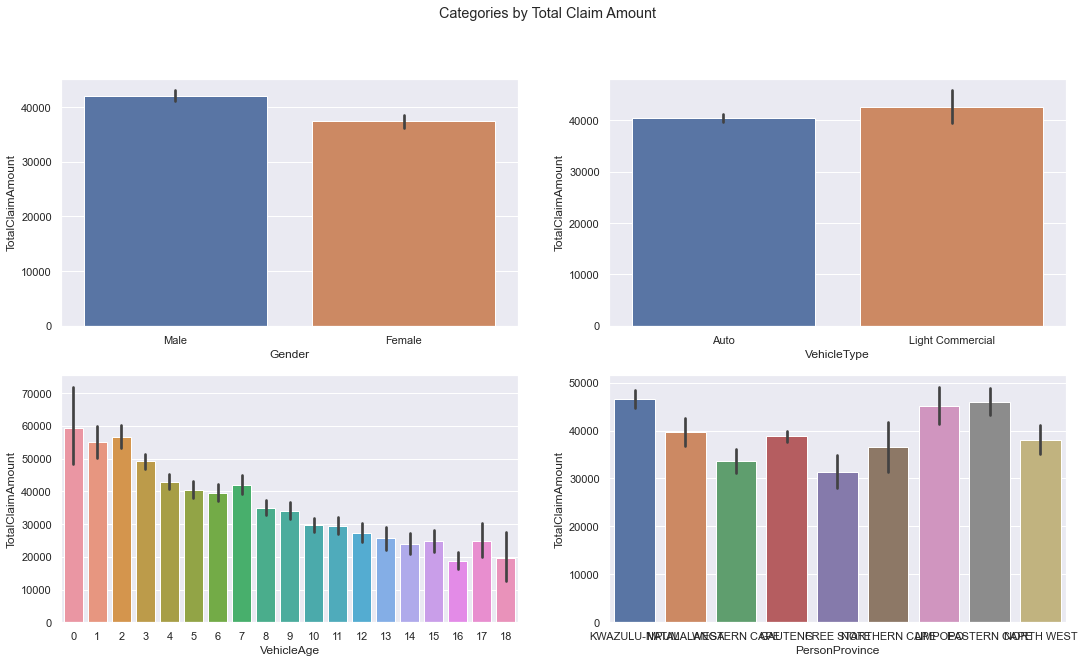

In [47]:
fig, axes = plt.subplots(2, 2, figsize=(18, 10))
fig.suptitle('Categories by Total Claim Amount')
sns.barplot(ax=axes[0, 0], data=ins_claim, x='Gender', y='TotalClaimAmount')
sns.barplot(ax=axes[0, 1], data=ins_claim, x='VehicleType', y='TotalClaimAmount')
sns.barplot(ax=axes[1, 0], data=ins_claim, x='VehicleAge', y='TotalClaimAmount')
sns.barplot(ax=axes[1, 1], data=ins_claim, x='PersonProvince', y='TotalClaimAmount');

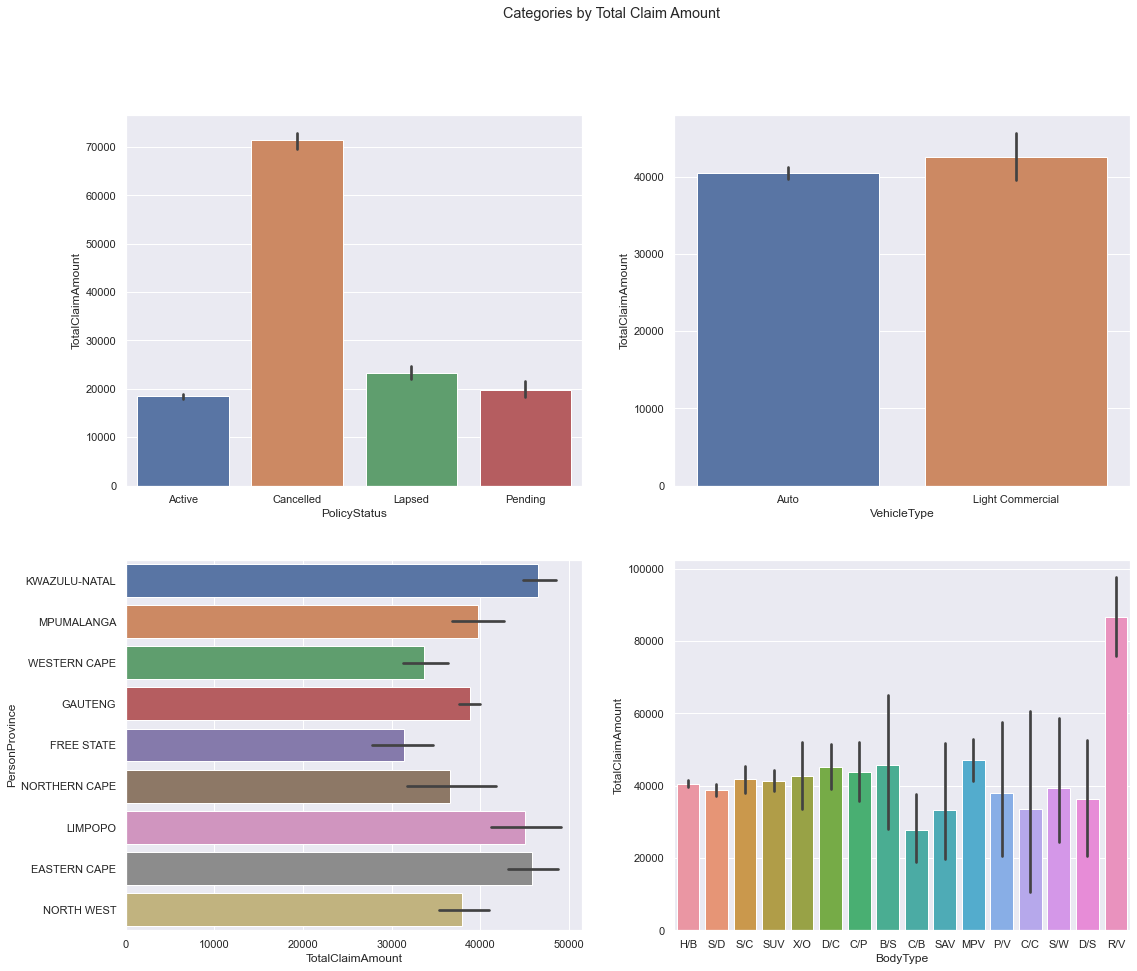

In [48]:
fig, axes = plt.subplots(2, 2, figsize=(18, 15))
fig.suptitle('Categories by Total Claim Amount')
sns.barplot(ax=axes[0, 0], data=ins_claim, x='PolicyStatus', y='TotalClaimAmount')
sns.barplot(ax=axes[0, 1], data=ins_claim, x='VehicleType', y='TotalClaimAmount')
sns.barplot(ax=axes[1, 0], data=ins_claim, x='TotalClaimAmount', y='PersonProvince')
sns.barplot(ax=axes[1, 1], data=ins_claim, x='BodyType', y='TotalClaimAmount');

**Observations:**     
On average, policyholders who have cancelled their insurance contract have the highest total claim amount. It could be that they usually cancel their contract immediately after making a claim.     
HatchBack bodytype cars are the mostly insured cars and frequently make claims but do not seem to be high on amount.
New cars(0-4years) frequently make claims and they are expensive.
KWAZULU-NATAL, LIMPOPO and EASTERN CAPE are places where high amount of claims are made.

<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

Next, on this phase of the project, we are going to:
- Replace `null` values with zero(0) on the `TotaClaimAmount` feature.
- Replace `null` values with the mode on some of the categorical features with very few null values such as `PolicyStatus`, `Gender`, `Transmission`, `BodyType`, `Colour` and more.
- Create the Target variable `AverageClaimAmount` which will be gotten from `TotalClaimAmount` and `CountClaim`. 
- Drop the columns that will no be useful to training the model(s) like `Claimid`, `Policyid`, `PremiumSum`, `MonthsSinceInception` and more.
- Create other features like `VehicleAge`, `ClaimFrequency`, `Exposure`, `Age`.
- Clean messy features like `occupation` and `Model`.

We will be performing these actions on the complete dataset.

#### Replacing missing value with 0 in `Totalclaimamount` and `Countclaim` columns

In [49]:
# replace missing value with 0
ins_claim_df['TotalClaimAmount'] = ins_claim_df['TotalClaimAmount'].fillna(0)
ins_claim_df['CountClaim'] = ins_claim_df['CountClaim'].fillna(0)
ins_claim_df.head()

,PolicyId,ClaimId,TotalClaimAmount,CountClaim,PremiumSum,CasePremiumSum,PaymentDueDate,TotalPremiumPaymentCount,PreviousInsurerExcess,PreviousInsurerPremium,...,PolicyStatus,CommencementDt,PolicyEndDate,SumAssured,MeanExcess,TotalExcess,ExcessTypesCount,BaseExcess,NomimatedDriversCount,NomimatedDriversUnder30Count
0,10806273,NaN,0.0,0.0,4915.98,4369.76,2021-12-29,8.0,0.0,0.0,...,Cancelled,2020-01-06,2021-12-29 14:46:25.4847000,45700.0,3166.666666,19000.0,6.0,1000.0,2.0,1.0
1,10822247,NaN,0.0,0.0,3342.60,668.52,2020-09-30,1.0,4500.0,900.0,...,Lapsed,2020-05-18,2020-10-16 00:00:44.0122000,113100.0,4500.000000,9000.0,2.0,5000.0,1.0,1.0
2,10941976,NaN,0.0,0.0,1762.54,1762.54,2022-07-28,3.0,0.0,808.0,...,Active,2022-05-30,NaN,92900.0,3333.333333,20000.0,6.0,1000.0,0.0,0.0
3,10782539,NaN,0.0,0.0,3723.60,3723.60,2021-08-31,5.0,0.0,0.0,...,Cancelled,2019-07-18,2021-09-25 14:09:25.7650000,173800.0,5720.000000,34320.0,6.0,5000.0,1.0,0.0
4,10916477,NaN,0.0,0.0,2478.72,0.00,2022-03-31,0.0,0.0,0.0,...,Lapsed,2022-01-10,2022-04-16 00:02:41.8644000,240200.0,6286.666666,37720.0,6.0,5000.0,0.0,0.0


In [50]:
ins_claim_df.isnull().sum()[:5]

PolicyId                 0
ClaimId             235512
TotalClaimAmount         0
CountClaim               0
PremiumSum             240
dtype: int64

#### Replacing missing values in categorical features with their mode.

These features have just 6 missing values out of over 260,000 observations. this is less than 0.1% of the dataset. Replacing these values with the mode of their various feature is not a bad idea.

In [51]:
# Selecting the neccessary features with few null values into a list
columns = ['EmploymentType', 'Occupation', 'IndustryType', 'Gender' , 'BirthDt', 'MaritalStatus', 
           'Model', 'Colour', 'Transmission', 'VehicleType' , 'BodyType', 'Cyl', 'Kilowatts', 
           'VehicleYear', 'PolicyMainDriverAnnualMileage', 'PolicyMainDriverLicenseDurationRange', 
           'PersonProvince', 'PolicyStatus', 'NomimatedDriversCount', 'CubicCapacity', 'ExcessTypesCount']

#checking their mode values
mode_values = ins_claim_df.filter(columns).mode()
mode_values

,EmploymentType,Occupation,IndustryType,Gender,BirthDt,MaritalStatus,Model,Colour,Transmission,VehicleType,...,Cyl,Kilowatts,VehicleYear,PolicyMainDriverAnnualMileage,PolicyMainDriverLicenseDurationRange,PersonProvince,PolicyStatus,NomimatedDriversCount,CubicCapacity,ExcessTypesCount
0,Permanent,Educator,Other,Male,1988-02-22,Single,POLO VIVO 1.4 TRENDLINE (5DR),white,M,Auto,...,4.0,66.0,2019.0,15000+ km,6 to 11 years,GAUTENG,Active,0.0,1398.0,6.0


In [52]:
# filling them with their mode value
ins_claim_df[columns] = ins_claim_df[columns].fillna(ins_claim_df.mode().iloc[0])

In [53]:
#check the dataframe
ins_claim_df.isnull().sum()

PolicyId                                     0
ClaimId                                 235512
TotalClaimAmount                             0
CountClaim                                   0
PremiumSum                                 240
CasePremiumSum                             240
PaymentDueDate                             240
TotalPremiumPaymentCount                   240
PreviousInsurerExcess                       27
PreviousInsurerPremium                      29
EmploymentType                               0
IsMemberPayer                                0
Occupation                                   0
IndustryType                                 0
Gender                                       0
BirthDt                                      0
MaritalStatus                                0
Make                                         6
Model                                        0
Colour                                       0
Transmission                                 0
VehicleType  

#### Replacing missing values in numerical features with their mean

some of these features have just 6 missing values out of over 260,000 observations. this is less than 0.1% of the dataset. Replacing these values with the mean of their various feature is not a bad idea.

In [54]:
#selecting specific features to be filled
num_columns = ["TotalExcess", "MeanExcess", "SumAssured", "BaseExcess", 
               "PreviousInsurerExcess", "PreviousInsurerPremium"]

#checking their mean values
mean_values = ins_claim_df.filter(num_columns).median()
mean_values

TotalExcess                27270.0
MeanExcess                  5000.0
SumAssured                147800.0
BaseExcess                  5000.0
PreviousInsurerExcess          0.0
PreviousInsurerPremium       458.0
dtype: float64

In [55]:
# replace missing value with mean
for m in num_columns:
    ins_claim_df[m].fillna(ins_claim_df[m].median(), inplace=True)

ins_claim_df.head()

,PolicyId,ClaimId,TotalClaimAmount,CountClaim,PremiumSum,CasePremiumSum,PaymentDueDate,TotalPremiumPaymentCount,PreviousInsurerExcess,PreviousInsurerPremium,...,PolicyStatus,CommencementDt,PolicyEndDate,SumAssured,MeanExcess,TotalExcess,ExcessTypesCount,BaseExcess,NomimatedDriversCount,NomimatedDriversUnder30Count
0,10806273,NaN,0.0,0.0,4915.98,4369.76,2021-12-29,8.0,0.0,0.0,...,Cancelled,2020-01-06,2021-12-29 14:46:25.4847000,45700.0,3166.666666,19000.0,6.0,1000.0,2.0,1.0
1,10822247,NaN,0.0,0.0,3342.60,668.52,2020-09-30,1.0,4500.0,900.0,...,Lapsed,2020-05-18,2020-10-16 00:00:44.0122000,113100.0,4500.000000,9000.0,2.0,5000.0,1.0,1.0
2,10941976,NaN,0.0,0.0,1762.54,1762.54,2022-07-28,3.0,0.0,808.0,...,Active,2022-05-30,NaN,92900.0,3333.333333,20000.0,6.0,1000.0,0.0,0.0
3,10782539,NaN,0.0,0.0,3723.60,3723.60,2021-08-31,5.0,0.0,0.0,...,Cancelled,2019-07-18,2021-09-25 14:09:25.7650000,173800.0,5720.000000,34320.0,6.0,5000.0,1.0,0.0
4,10916477,NaN,0.0,0.0,2478.72,0.00,2022-03-31,0.0,0.0,0.0,...,Lapsed,2022-01-10,2022-04-16 00:02:41.8644000,240200.0,6286.666666,37720.0,6.0,5000.0,0.0,0.0


In [56]:
#check the dataframe
ins_claim_df.isnull().sum()

PolicyId                                     0
ClaimId                                 235512
TotalClaimAmount                             0
CountClaim                                   0
PremiumSum                                 240
CasePremiumSum                             240
PaymentDueDate                             240
TotalPremiumPaymentCount                   240
PreviousInsurerExcess                        0
PreviousInsurerPremium                       0
EmploymentType                               0
IsMemberPayer                                0
Occupation                                   0
IndustryType                                 0
Gender                                       0
BirthDt                                      0
MaritalStatus                                0
Make                                         6
Model                                        0
Colour                                       0
Transmission                                 0
VehicleType  

#### Creating the target variable `AverageClaimAmount` 
This can be gotten by dividing the `TotalClaimAmount` by `Countclaim`. This will be our target variable.

In [57]:
# creating column using lambda
ins_claim_df['AverageClaimAmount'] = ins_claim_df.apply(lambda x: x['TotalClaimAmount'] if x['TotalClaimAmount'] < 1 else 
                                                        x['TotalClaimAmount']/x['CountClaim'], axis=1)

In [58]:
#check the dataframe
ins_claim_df.tail()

,PolicyId,ClaimId,TotalClaimAmount,CountClaim,PremiumSum,CasePremiumSum,PaymentDueDate,TotalPremiumPaymentCount,PreviousInsurerExcess,PreviousInsurerPremium,...,CommencementDt,PolicyEndDate,SumAssured,MeanExcess,TotalExcess,ExcessTypesCount,BaseExcess,NomimatedDriversCount,NomimatedDriversUnder30Count,AverageClaimAmount
262985,10782382,NaN,0.00,0.0,5617.59,5617.59,2022-03-07,12.0,0.0,0.0,...,2019-07-18,NaN,79100.0,3583.333333,21500.0,6.0,2500.0,0.0,0.0,0.00
262986,10945496,NaN,0.00,0.0,764.77,764.77,2022-07-31,1.0,0.0,588.0,...,2022-06-20,NaN,134400.0,4573.333333,27440.0,6.0,5000.0,1.0,0.0,0.00
262987,10804440,NaN,0.00,0.0,2344.60,1743.42,2020-03-31,4.0,0.0,0.0,...,2019-12-09,2020-07-16 00:09:30.5379000,147800.0,4500.000000,9000.0,2.0,5000.0,0.0,0.0,0.00
262988,10789380,NaN,0.00,0.0,2396.00,2396.00,2022-07-25,4.0,5000.0,1500.0,...,2019-08-30,NaN,120200.0,3901.666666,23410.0,6.0,4000.0,0.0,0.0,0.00
262989,10827523,10100314.0,72875.32,2.0,6403.82,6403.82,2021-03-27,10.0,0.0,0.0,...,2020-07-01,2021-04-30 12:33:26.2755000,112900.0,5322.500000,21290.0,4.0,5000.0,0.0,0.0,36437.66


#### Cleaning the `Occupation` column.

The `Occupation` features contain inconsistent string values. For example, to Pandas, `Self Employed`, `selfemployed` and `self-employed` are three different unique values. So I will convert all values to lowercase and remove special characters if any. The categorical values are also mtoo many, so I will select the top 10 values and convert the remaining vales to `others`.

In [59]:
#This was done on the EDA but not to the full dataset.
#converting the occupation column to lowercase
ins_claim_df['Occupation'] = ins_claim_df['Occupation'].str.lower()
#replacing special charatcer'-' with space
ins_claim_df['Occupation'] = ins_claim_df['Occupation'].replace(to_replace ='-', value = ' ', regex = True)

In [60]:
ins_claim_df['Occupation'].value_counts().head(10)

educator          16511
self employed     13539
teacher            7297
driver             6587
nurse              6204
police officer     4939
operator           4543
supervisor         3408
manager            3372
unemployed         3343
Name: Occupation, dtype: int64

In [61]:
#replacing occupations with their general name
ins_claim_df['Occupation'] = ins_claim_df.Occupation.str.replace(r'(^.*nurse.*$)', 'nurse')
ins_claim_df['Occupation'] = ins_claim_df.Occupation.str.replace(r'(^.*consult.*$)', 'consultant')
ins_claim_df['Occupation'] = ins_claim_df.Occupation.str.replace(r'(^.*admin.*$)', 'administrator')
ins_claim_df['Occupation'] = ins_claim_df.Occupation.str.replace(r'(^.*lecture.*$)', 'teacher')
ins_claim_df['Occupation'] = ins_claim_df.Occupation.str.replace(r'(^.*artisan.*$)', 'artisan')
ins_claim_df['Occupation'] = ins_claim_df.Occupation.str.replace(r'(^.*police.*$)', 'police officer')
ins_claim_df['Occupation'] = ins_claim_df.Occupation.str.replace(r'(^.*supervisor.*$)', 'supervisor')
ins_claim_df['Occupation'] = ins_claim_df.Occupation.str.replace(r'(^.*manager.*$)', 'manager')
ins_claim_df['Occupation'] = ins_claim_df.Occupation.str.replace(r'(^.*driver.*$)', 'driver')
ins_claim_df['Occupation'] = ins_claim_df.Occupation.str.replace(r'(^.*self.*$)', 'self employed')
ins_claim_df['Occupation'] = ins_claim_df.Occupation.str.replace(r'(^.*worker.*$)', 'worker')
ins_claim_df['Occupation'] = ins_claim_df.Occupation.str.replace(r'(^.*constable.*$)', 'police officer')

In [62]:
# make a list of the most frequent categories of the column
top_10_occurring_occ = [occ for occ in ins_claim_df.Occupation.value_counts().sort_values(
    ascending = False).head(10).index]

# list of other occupation
occupations = list(ins_claim_df['Occupation'].unique())
others = [ x for x in occupations if x not in top_10_occurring_occ ]

In [63]:
def group_occupation(input_df, others):
    for title in others:
        input_df['Occupation'].replace(title, 'other', inplace=True)
    
    return input_df

In [64]:
ins_claim_df = group_occupation(ins_claim_df, others)

In [65]:
ins_claim_df.Occupation.unique()

array(['consultant', 'other', 'manager', 'educator', 'driver', 'nurse',
       'self employed', 'police officer', 'administrator', 'supervisor',
       'teacher'], dtype=object)

#### Cleaning the `Model` column 

The model of the insured vehicle can serve as an important feature for building our model. But we have to group and rename these car models(the values) in the `Model` column by their various model names. As well as selecting the top ten values.

In [66]:
#converting the model column to lowercase
ins_claim_df['Model'] = ins_claim_df['Model'].str.lower()
ins_claim_df['Model'].value_counts().head(10)

polo vivo 1.4 trendline (5dr)         7453
polo vivo gp 1.4 trendline 5dr        4357
polo vivo 1.4 comfortline (5dr)       4104
i20 1.2 motion                        3682
polo gp 1.2 tsi comfortline (66kw)    3453
polo 1.0 tsi trendline                3433
polo 1.0 tsi comfortline              3365
kwid 1.0 dynamique 5dr                2914
polo vivo gp 1.4 conceptline 5dr      2824
corolla quest 1.6                     2703
Name: Model, dtype: int64

In [67]:
# extracting the first word in model values
ins_claim_df['Model'] = ins_claim_df.Model.str.split(" ").str.get(0)
ins_claim_df['Model'].value_counts().head(10)

polo       58841
corolla     9140
i20         7523
etios       6268
kwid        5665
grand       5359
sandero     5186
picanto     4997
fiesta      4895
np200       4773
Name: Model, dtype: int64

In [68]:
# renaming the values in the Model column with 'Make Model'
ins_claim_df['Model'] = ins_claim_df['Model'].replace({'polo': 'volkswagen polo', 'corolla': 'toyota corolla', 
                                                                'i20': 'hyundai i20', 'etios': 'toyota etios', 
                                                                'kwid': 'renaultk wid', 'grand': 'hyundai grand', 
                                                                'sandero': 'dacia sandero', 'picanto': 'kia_picanto', 
                                                                'fiesta': 'ford fiesta', 'np200': 'nissan np200', 
                                                                'golf': 'volkswagen golf', 'clio': 'renault clio', 
                                                                'rio': 'kia rio', 'hilux': 'toyota hilux', 
                                                                'figo': 'ford figo', 'ranger': 'ford_ranger', 
                                                                'yaris': 'toyota yaris', '320i': 'bmw_320i', 
                                                                'go': 'datsun go', 'a4': 'audi a4'})

In [69]:
ins_claim_df['Model'].value_counts().head(10)

volkswagen polo    58841
toyota corolla      9140
hyundai i20         7523
toyota etios        6268
renaultk wid        5665
hyundai grand       5359
dacia sandero       5186
kia_picanto         4997
ford fiesta         4895
nissan np200        4773
Name: Model, dtype: int64

In [70]:
cars = [model for model in ins_claim_df.Model.value_counts().sort_values(ascending = False).head(10).index]

# list of other cars
all_cars = list(ins_claim_df['Model'].unique())
others = [ x for x in all_cars if x not in cars ]

In [71]:
def group_carmodel(input_df, others):
    for modelname in others:
        input_df['Model'].replace(modelname, 'other', inplace=True)
    
    return input_df

In [72]:
ins_claim_df = group_carmodel(ins_claim_df, others)

In [73]:
ins_claim_df.Model.unique()

array(['volkswagen polo', 'other', 'hyundai grand', 'dacia sandero',
       'nissan np200', 'toyota etios', 'hyundai i20', 'ford fiesta',
       'toyota corolla', 'renaultk wid', 'kia_picanto'], dtype=object)

#### Cleaning the `Colour` column. 

In [74]:
#converting the occupation column to lowercase
ins_claim_df['Colour'] = ins_claim_df['Colour'].str.lower()
ins_claim_df['Colour'].value_counts().head(10)

white       93591
silver      53321
grey        27054
blue        23480
red         21859
other       17247
black        7954
gold         3292
brown        3157
charcoal     3142
Name: Colour, dtype: int64

In [75]:
colours = [col for col in ins_claim_df.Colour.value_counts().sort_values(ascending = False).head(10).index]

# list of other cars
all_colours = list(ins_claim_df['Colour'].unique())
others = [ x for x in all_colours if x not in colours]

In [76]:
def group_colour(input_df, others):
    for colourname in others:
        input_df['Colour'].replace(colourname, 'other', inplace=True)
    
    return input_df

In [77]:
ins_claim_df = group_colour(ins_claim_df, others)

In [78]:
ins_claim_df.Colour.unique()

array(['grey', 'silver', 'white', 'blue', 'other', 'gold', 'charcoal',
       'black', 'red', 'brown'], dtype=object)

#### Cleaning `IndustryType` column 

In [79]:
# converting to lowercase
ins_claim_df['IndustryType'] = ins_claim_df['IndustryType'].str.lower()
ins_claim_df['IndustryType'].value_counts().head(20)

other                                 128247
government                             48685
professional                           28914
government education                   20973
office / clerical / manager            14566
mining                                 11616
medical                                 6907
construction                            2751
charity                                  197
trade (e.g electrician or plumber)       134
Name: IndustryType, dtype: int64

In [80]:
# renaming values in the industrytype column
ins_claim_df['IndustryType'] = ins_claim_df.IndustryType.str.replace(r'(^.*trade.*$)', 'trade')
ins_claim_df['IndustryType'] = ins_claim_df.IndustryType.str.replace(r'(^.*education.*$)', 'education')
ins_claim_df['IndustryType'] = ins_claim_df.IndustryType.str.replace(r'(^.*office.*$)', 'office')
ins_claim_df['IndustryType'].value_counts().head(20)

other           128247
government       48685
professional     28914
education        20973
office           14566
mining           11616
medical           6907
construction      2751
charity            197
trade              134
Name: IndustryType, dtype: int64

In [81]:
ins_claim_df.IndustryType.unique()

array(['office', 'government', 'other', 'professional', 'education',
       'medical', 'mining', 'construction', 'charity', 'trade'],
      dtype=object)

renaming the values in some of the categorical features.

In [82]:
# renaming values in the industrytype column
#ins_claim_df['PersonProvince'] = ins_claim_df.PersonProvince.str.replace(r'(^.*KWAZULU.*$)', 'KWAZULU NATAL')
#ins_claim_df['PersonProvince'] = ins_claim_df.PersonProvince.str.replace(r'(^.*EASTERN.*$)', 'EASTERN CAPE')
#ins_claim_df['PersonProvince'] = ins_claim_df.PersonProvince.str.replace(r'(^.*WESTERN.*$)', 'WESTERN CAPE')
#ins_claim_df['PersonProvince'] = ins_claim_df.PersonProvince.str.replace(r'(^.*NORTHERN.*$)', 'NORTHERN CAPE')
#ins_claim_df['PersonProvince'] = ins_claim_df.PersonProvince.str.replace(r'(^.*NORTH.*$)', 'NORTH_WEST')
#ins_claim_df['PersonProvince'] = ins_claim_df.PersonProvince.str.replace(r'(^.*FREE.*$)', 'FREE_STATE')

In [83]:
#ins_claim_df['EmploymentType'] = ins_claim_df.EmploymentType.str.replace(r'(^.*Casual.*$)', 'Temporary_Casual')
#ins_claim_df['EmploymentType'] = ins_claim_df.EmploymentType.str.replace(r'(^.*Part.*$)', 'Part_time')
#ins_claim_df['EmploymentType'] = ins_claim_df.EmploymentType.str.replace(r'(^.*Self.*$)', 'Self_Employed')
#ins_claim_df['EmploymentType'] = ins_claim_df.EmploymentType.str.replace(r'(^.*Commission.*$)', 'Commission_Earner')

In [84]:
#ins_claim_df['PolicyMainDriverAnnualMileage'] = ins_claim_df.PolicyMainDriverAnnualMileage.str.replace(
    #r'(^.*<5000 km.*$)', 'less_than_5000km')

#ins_claim_df['PolicyMainDriverAnnualMileage'] = ins_claim_df.PolicyMainDriverAnnualMileage.str.replace(
    #r'(^.*15000+.*$)', 'more_than_15000km')

#ins_claim_df['PolicyMainDriverAnnualMileage'] = ins_claim_df.PolicyMainDriverAnnualMileage.str.replace(
    #r'(^.*5000 to 9999 km.*$)', '5000_to_9999km')

#ins_claim_df['PolicyMainDriverAnnualMileage'] = ins_claim_df.PolicyMainDriverAnnualMileage.str.replace(
   # r'(^.*10000 to 14999 km.*$)', '10000_to_14999km')

In [85]:
#ins_claim_df['PolicyMainDriverLicenseDurationRange'] = ins_claim_df.PolicyMainDriverLicenseDurationRange.str.replace(
    #r'(^.*15 years*$)', 'more_than_15years')

#ins_claim_df['PolicyMainDriverLicenseDurationRange'] = ins_claim_df.PolicyMainDriverLicenseDurationRange.str.replace(
    #r'(^.*6 to 11 years.*$)', '6_to_11years')

#ins_claim_df['PolicyMainDriverLicenseDurationRange'] = ins_claim_df.PolicyMainDriverLicenseDurationRange.str.replace(
    #r'(^.*1 to 6 years.*$)', '1_to_6years')

#ins_claim_df['PolicyMainDriverLicenseDurationRange'] = ins_claim_df.PolicyMainDriverLicenseDurationRange.str.replace(
    #r'(^.*<1 Year.*$)', 'less_than_1year')

#ins_claim_df['PolicyMainDriverLicenseDurationRange'] = ins_claim_df.PolicyMainDriverLicenseDurationRange.str.replace(
    #r'(^.*11 to 15 years.*$)', '11_to_15years')

#### Creating the `Age` column

Here, I will derive the age of the policyholder from the `BirthDt` column.

In [86]:
# function to convert given date to age
def age(born):
    born = datetime.strptime(born, "%Y-%m-%d").date()
    today = date.today()
    return today.year - born.year - ((today.month, 
                                      today.day) < (born.month, 
                                                    born.day))

In [87]:
# creating age column from the function
ins_claim_df['Age'] = ins_claim_df['BirthDt'].astype('str').apply(age)

#### Creating the `VehicleAge` column

In [88]:
# function to subtract curent year from vehicle Age
def vehicleAge(born):
    return 2022 - born

In [89]:
# creating vehicleage column from the function
ins_claim_df['VehicleAge'] = ins_claim_df['VehicleYear'].apply(vehicleAge)
ins_claim_df['VehicleAge'] = ins_claim_df['VehicleYear'].apply(vehicleAge).astype(int)

#### Creating the `Exposure` feature 

Exposure is a fraction of the year during which the policyholder is exposed to risk. 

To get this, I will first make sure that the start-date and the end-date of the insurance policy is in pandas `datetime`. If the policy has not ended(active), I will replace null values with present date. 

In [90]:
#creating the Exposure column for the overall dataframe
ins_claim_df['PolicyEndDate'] = pd.to_datetime(ins_claim_df['PolicyEndDate'])
ins_claim_df["Exposure"] = [(-1*round((x-y).total_seconds()/(60*60*24))/365) 
                            if pd.isna(y)==False and (-1*round((x-y).total_seconds()/(60*60*24))/365) < 1 
                            else 1 for x,y in zip(ins_claim_df["CommencementDt"], ins_claim_df["PolicyEndDate"])]

In [91]:
#convert negative values to positive in `Exposure` feature as it will be used for sample weight
#ins_claim_df['Exposure'] = abs(ins_claim_df['Exposure'])
#ins_claim_df_ohe['Exposure'] = abs(ins_claim_df_ohe['Exposure'])

In [92]:
#calculate the number of days between two days
#ins_claim_df['PolicyEndDate'] = pd.to_datetime(ins_claim_df['PolicyEndDate'])
#ins_claim_df['PolicyEndDate'] = ins_claim_df['PolicyEndDate'].fillna(pd.datetime.now().strftime("%Y-%m-%d"))
#ins_claim_df['DaysSinceInception'] = (ins_claim_df['PolicyEndDate'] - ins_claim_df['CommencementDt']).dt.days

#### Creating ClaimFrequency Column

The claim frequency rate is a rate which can be estimated as the number of claims divided by the number of units of exposure.

In [93]:
#creating the frequency column for the overall dataframe
ins_claim_df["ClaimFrequency"] = (ins_claim_df["CountClaim"]/ins_claim_df["Exposure"])

In [94]:
ins_claim_df.tail(5)

,PolicyId,ClaimId,TotalClaimAmount,CountClaim,PremiumSum,CasePremiumSum,PaymentDueDate,TotalPremiumPaymentCount,PreviousInsurerExcess,PreviousInsurerPremium,...,TotalExcess,ExcessTypesCount,BaseExcess,NomimatedDriversCount,NomimatedDriversUnder30Count,AverageClaimAmount,Age,VehicleAge,Exposure,ClaimFrequency
262985,10782382,NaN,0.00,0.0,5617.59,5617.59,2022-03-07,12.0,0.0,0.0,...,21500.0,6.0,2500.0,0.0,0.0,0.00,40,12,1.000000,0.000000
262986,10945496,NaN,0.00,0.0,764.77,764.77,2022-07-31,1.0,0.0,588.0,...,27440.0,6.0,5000.0,1.0,0.0,0.00,37,8,1.000000,0.000000
262987,10804440,NaN,0.00,0.0,2344.60,1743.42,2020-03-31,4.0,0.0,0.0,...,9000.0,2.0,5000.0,0.0,0.0,0.00,51,10,0.602740,0.000000
262988,10789380,NaN,0.00,0.0,2396.00,2396.00,2022-07-25,4.0,5000.0,1500.0,...,23410.0,6.0,4000.0,0.0,0.0,0.00,59,7,1.000000,0.000000
262989,10827523,10100314.0,72875.32,2.0,6403.82,6403.82,2021-03-27,10.0,0.0,0.0,...,21290.0,4.0,5000.0,0.0,0.0,36437.66,34,7,0.832877,2.401316


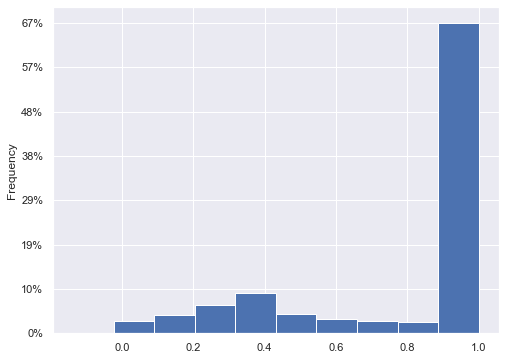

In [95]:
#visualizing exposure
ax = ins_claim_df['Exposure'].plot(kind='hist', figsize=(8,6))
ax.yaxis.set_major_formatter(mtick.PercentFormatter(ins_claim_df.shape[0]))

#### Dropping Unnecessary columns

In [96]:
#view a list of all the columns on the dataset
ins_claim_df.columns

Index(['PolicyId', 'ClaimId ', 'TotalClaimAmount', 'CountClaim', 'PremiumSum',
       'CasePremiumSum', 'PaymentDueDate', 'TotalPremiumPaymentCount',
       'PreviousInsurerExcess', 'PreviousInsurerPremium', 'EmploymentType',
       'IsMemberPayer', 'Occupation', 'IndustryType', 'Gender', 'BirthDt',
       'MaritalStatus', 'Make', 'Model', 'Colour', 'Transmission',
       'VehicleType', 'BodyType', 'CubicCapacity', 'Cyl', 'Kilowatts',
       'VehicleYear', 'PolicyMainDriverAnnualMileage',
       'PolicyMainDriverLicenseDurationRange', 'PersonProvince', 'Area',
       'MonthsSinceInception', 'DaysSinceInception', 'PolicyStatus',
       'CommencementDt', 'PolicyEndDate', 'SumAssured', 'MeanExcess',
       'TotalExcess', 'ExcessTypesCount', 'BaseExcess',
       'NomimatedDriversCount', 'NomimatedDriversUnder30Count',
       'AverageClaimAmount', 'Age', 'VehicleAge', 'Exposure',
       'ClaimFrequency'],
      dtype='object')

In [97]:
# List of columns to be dropped
drop_cols = ['PolicyId', 'ClaimId ', 'TotalClaimAmount', 'PremiumSum','CasePremiumSum', 
             'PaymentDueDate', 'TotalPremiumPaymentCount', 'IsMemberPayer', 
             'BirthDt', 'Make', 'VehicleYear',  'Area', 'MonthsSinceInception', 'CountClaim', 
             'DaysSinceInception', 'CommencementDt', 'PolicyEndDate', 
             'ClaimFrequency', 'NomimatedDriversUnder30Count', 'PolicyStatus']

In [98]:
ins_claim_df.drop(columns=drop_cols, inplace=True)

In [99]:
ins_claim_df.shape

(262990, 28)

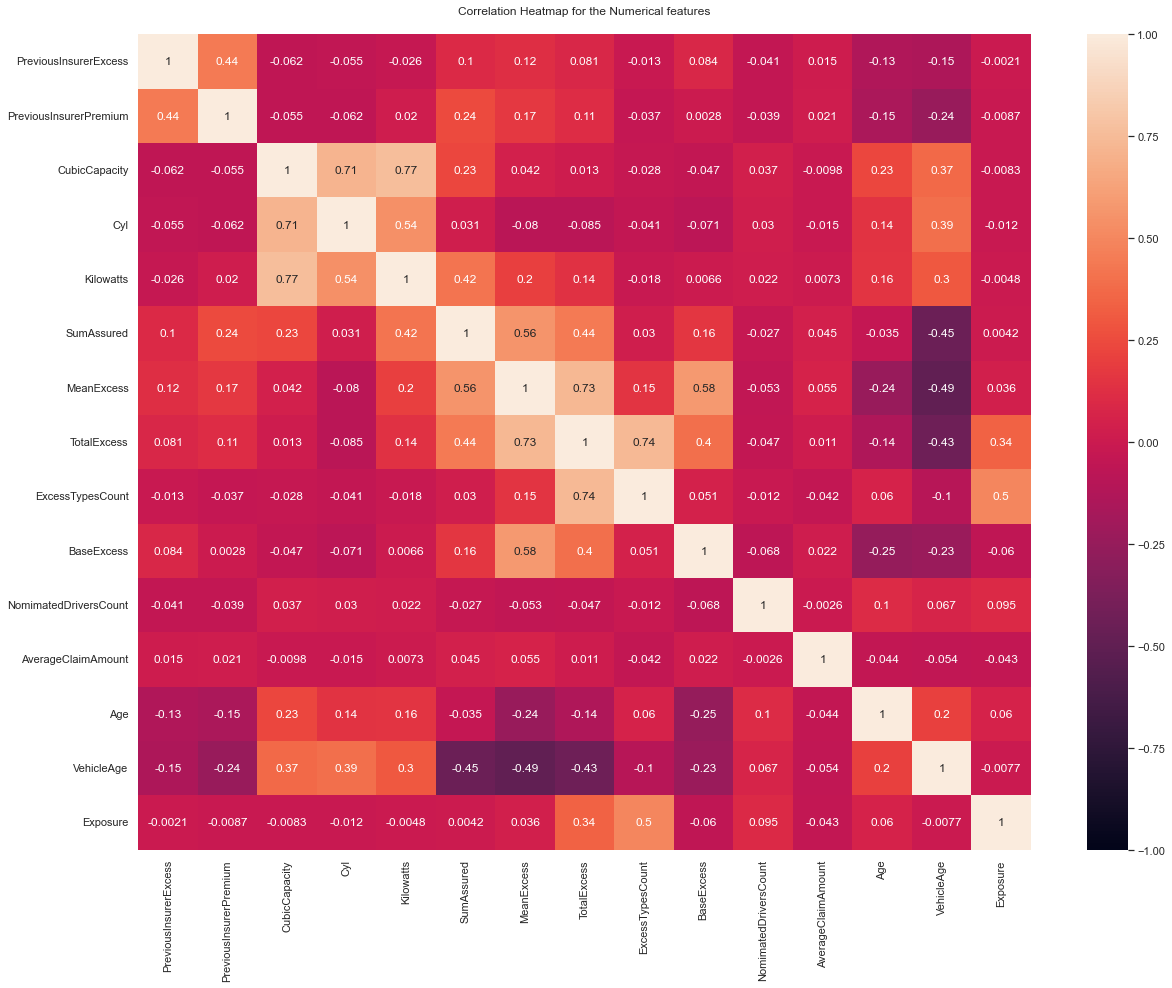

In [100]:
#plotting a heat map to check the level of correlation between the numerical features
numeric_columns = ins_claim_df.dtypes[ins_claim_df.dtypes != "object"].index 
heatmap = sns.heatmap(ins_claim_df[numeric_columns].corr(), vmin=-1, vmax=1, annot=True)
sns.set(rc = {'figure.figsize':(15,10)})
heatmap.set_title('Correlation Heatmap for the Numerical features', fontdict={'fontsize':12}, pad=20);

#### Performing one hot encoding on categorical features

Models can only be trained with numerical values. Therefore, categorical features with object datatype would be converted to numerical using Pandas dummy variable encoding.

In [101]:
#select categorical datatypes
categorical_features = ins_claim_df.select_dtypes(include=['object']).columns.tolist()

In [102]:
#using dummy encoder for one hot encoding
ins_claim_df_ohe = ins_claim_df

for col in categorical_features:
    col_ohe = pd.get_dummies(ins_claim_df[col], prefix=col)
    ins_claim_df_ohe = pd.concat((ins_claim_df_ohe, col_ohe), axis=1).drop(col, axis=1)

In [103]:
ins_claim_df_ohe.shape

(262990, 109)

In [104]:
# instantiate sklearn onehote encoder
#ohe = OneHotEncoder()

# transform the categorical features
#transformed_data = ohe.fit_transform(ins_claim_df[categorical_features])

# the above transformed_data is an array so convert it to dataframe
#encoded_data = pd.DataFrame(transformed_data, index=ins_claim_df.index)

# concatenate the original data and the encoded data using pandas
#ins_claim_df_ohe = pd.concat([ins_claim_df, encoded_data], axis=1)

#### Performing Binarization on selected features

Here, we will scale some of the numerical features to be used for modeling. Scaling involves bring the values in multiple features to the same size or magnitude.

In [105]:
#specifying on the number of bins to produce
#n_bins = 10
#selecting specific features to be binarized
#binarize_columns = ["ExcessTypesCount", "TotalExcess", "MeanExcess", "SumAssured",
                        #"CubicCapacity", "PreviousInsurerExcess", "PreviousInsurerPremium"]
#choosing my prefered binarizer
#binarizer = KBinsDiscretizer(n_bins=n_bins, encode='onehot-dense', strategy='uniform')

In [106]:
#ins_claim_df_ohe[binarize_columns] = binarizer.fit_transform(ins_claim_df_ohe[binarize_columns])

#### Scaling selected features

Here, we will scale some of the numerical features to be used for modeling. Scaling involves bring the values in multiple features to the same size or magnitude.

In [107]:
numerical_features = ['Cyl', 'Kilowatts', 'BaseExcess', 
                      'NomimatedDriversCount', 'Age', 'VehicleAge']

In [108]:
# Initialize StandardScaler from sklearn
scaler = StandardScaler()

In [109]:
# Save standardized features into new variable
#ins_claim_df_ohe[numerical_features] = scaler.fit_transform(ins_claim_df_ohe[numerical_features])

In [110]:
ins_claim_df_ohe.select_dtypes(include=['object']).columns.tolist()

[]

In [111]:
pd.set_option('display.width', 1000)

In [112]:
ins_claim_df_ohe.head()

,PreviousInsurerExcess,PreviousInsurerPremium,CubicCapacity,Cyl,Kilowatts,SumAssured,MeanExcess,TotalExcess,ExcessTypesCount,BaseExcess,...,PolicyMainDriverLicenseDurationRange_<1 Year,PersonProvince_EASTERN CAPE,PersonProvince_FREE STATE,PersonProvince_GAUTENG,PersonProvince_KWAZULU-NATAL,PersonProvince_LIMPOPO,PersonProvince_MPUMALANGA,PersonProvince_NORTH WEST,PersonProvince_NORTHERN CAPE,PersonProvince_WESTERN CAPE
0,0.0,0.0,1390.0,4.0,62.0,45700.0,3166.666666,19000.0,6.0,1000.0,...,0,0,0,0,1,0,0,0,0,0
1,4500.0,900.0,1398.0,4.0,55.0,113100.0,4500.000000,9000.0,2.0,5000.0,...,0,0,0,1,0,0,0,0,0,0
2,0.0,808.0,1398.0,4.0,55.0,92900.0,3333.333333,20000.0,6.0,1000.0,...,0,0,0,0,0,0,1,0,0,0
3,0.0,0.0,1248.0,4.0,62.0,173800.0,5720.000000,34320.0,6.0,5000.0,...,0,0,0,1,0,0,0,0,0,0
4,0.0,0.0,1998.0,4.0,135.0,240200.0,6286.666666,37720.0,6.0,5000.0,...,0,1,0,0,0,0,0,0,0,0


In [113]:
# removing infinite values before modeling
ins_claim_df_ohe.replace([np.inf, -np.inf], np.nan, inplace=True)
ins_claim_df_ohe.dropna(inplace=True)

<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

In this phase of our project, we will build a base model and compare it with other supervised learning models we will also build.

In [114]:
# droping rows with negative values
ins_claim_df_ohe = ins_claim_df_ohe[ins_claim_df_ohe.select_dtypes(include=[np.number]).ge(0).all(1)]
#ins_claim_made = ins_claim_made[ins_claim_made.select_dtypes(include=[np.number]).ge(0).all(1)]

In [115]:
#Extracting subset of data having a claim
#ins_claim_made = ins_claim_df_ohe[ins_claim_df_ohe.AverageClaimAmount >0]

In [116]:
#using Leave one out and target encoder
#looe = LeaveOneOutEncoder(cols=[categorical_features])
#Training_set  = enc.fit_transform(X_train, y_train)

#encoder = TargetEncoder(cols=[categorical_features])
#Training_set  = enc.fit_transform(X_train, y_train)

In [117]:
#replace special charatcers on features
ins_claim_df_ohe.columns = ins_claim_df_ohe.columns.str.replace('[#,@,&,-,/,>,<]+', '_')
regex = re.compile(r"\[|\]|<", re.IGNORECASE)
#making sure feature names do not contain [, ] or < for xgboost model
ins_claim_df_ohe.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '+', '-', '<'))) 
              else col for col in ins_claim_df_ohe.columns.values]

#ins_claim_made.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) 
              #else col for col in ins_claim_df_ohe.columns.values]

Splitting the dataset

In [118]:
#performing train test split
# split data
X = ins_claim_df_ohe.drop(['AverageClaimAmount'], axis=1)
y = ins_claim_df_ohe['AverageClaimAmount']

# What we will do here is to split our data into 80% for training and the remaining 20% for testing i.e test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 42)

EXPOSURE_TRAIN = X_train['Exposure']
X_train = X_train.drop(['Exposure'], axis=1)
X_test = X_test.drop(['Exposure'], axis=1)

Binarizer

In [119]:
# binarizing (fit and transform) the X_train data
#X_train[binarize_columns] = binarizer.fit_transform(X_train[binarize_columns])

In [120]:
# binarizing (transform only) the X_valid and X_test data
#X_valid[binarize_columns] = binarizer.transform(X_valid[binarize_columns])
#X_test[binarize_columns] = binarizer.transform(X_test[binarize_columns])

Scaler

In [121]:
# scaling (fit and transform) the X_train data
#X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])

In [122]:
# scale (transform only) the X_valid and X_test data
#X_valid[numerical_features] = scaler.transform(X_valid[numerical_features])
#X_test[numerical_features] = scaler.transform(X_test[numerical_features])

In [123]:
ins_claim_df_ohe.columns

Index(['PreviousInsurerExcess', 'PreviousInsurerPremium', 'CubicCapacity', 'Cyl', 'Kilowatts', 'SumAssured', 'MeanExcess', 'TotalExcess', 'ExcessTypesCount', 'BaseExcess',
       ...
       'PolicyMainDriverLicenseDurationRange__1 Year', 'PersonProvince_EASTERN CAPE', 'PersonProvince_FREE STATE', 'PersonProvince_GAUTENG', 'PersonProvince_KWAZULU-NATAL', 'PersonProvince_LIMPOPO', 'PersonProvince_MPUMALANGA', 'PersonProvince_NORTH WEST', 'PersonProvince_NORTHERN CAPE', 'PersonProvince_WESTERN CAPE'], dtype='object', length=109)

#### Base model

Our base model will be the simple linear model.

In [124]:
#Initialise the model
lm = LinearRegression()
#Fit the model into training set
lm.fit(X_train, y_train, sample_weight=EXPOSURE_TRAIN)

LinearRegression()

In [125]:
# Make predictions on the train sets
y_train_pred = lm.predict(X_train)
# Make predictions on the validation sets
#y_val_pred = lm.predict(X_valid)
# Make predictions on the test sets
y_test_pred = lm.predict(X_test)

After building our base model, we the the different evaluation metrics. We will focus on the Root Mean Squared Error.

#### GLM

In [126]:
# Training and test split
#mask = np.random.rand(len(ins_claim_df_ohe)) < 0.8
#df_train = ins_claim_df_ohe[mask]
#df_test = ins_claim_df_ohe[~mask]
#print('Training data set length = ' +str(len(df_train)))
#print('Testing data set length = ' +str(len(df_test)))

In [127]:
# Model expression
#expr = """AverageClaimAmount ~ Bodytype+Colour+VehicleAge+Gender+Occupation+Age"""

In [128]:
#Converting data into dmatrices
#y_train, X_train = dmatrices(expr, df_train, return_type='dataframe')
#y_test, X_test = dmatrices(expr, df_test, return_type='dataframe')

In [129]:
# Training model
#tweedie_model = sm.GLM(y_train, X_train, exposure = df_train.exposure, 
                       #family=sm.families.Tweedie(link=None,var_power=1.6,eql=True))

In [130]:
#tweedie_result = tweedie_model.fit()

In [131]:
#print(tweedie_result.summary2())

#### XGBoost Regressor

We will use the Extreme Gradient Boosting Regressor, on of the most powerful boosting algorithm used in supervised machine learning. It predicts by ensembling and combining the estimates of a set of simpler, weaker models.

In [132]:
dm_train = xgb.DMatrix(data=X_train, label=y_train)
dm_test = xgb.DMatrix(data=X_test, label=y_test)

In [133]:
#dm_train.set_base_margin(np.log(X_train['Exposure']))
#dm_test.set_base_margin(np.log(X_test['Exposure']))

In [134]:
params = {"objective":"reg:tweedie",'colsample_bytree': 1.0,'learning_rate': 0.01,
                'gamma':1.5,'max_depth': 2, 'subsample':0.6,'reg_alpha': 0, 
          'reg_lambda':1,'min_child_weight':5,'n_estimators':1200,
          "tweedie_variance_power":1.4}

cv_results = xgb.cv(dtrain=dm_train, params=params, nfold=3,
                    num_boost_round=2000, early_stopping_rounds=10, metrics="rmse", as_pandas=True, seed=234)

[12:22:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:22:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:22:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_estimators" } might not be used.

  Thi

In [135]:
cv_results.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,19823.754347,32.229078,19823.676403,64.362729
1,19823.751893,32.229066,19823.673949,64.362703
2,19823.750480,32.229070,19823.672538,64.362712
3,19823.747834,32.229073,19823.669895,64.362719
4,19823.745472,32.229085,19823.667535,64.362741


In [136]:
print((cv_results["test-rmse-mean"]).tail(1))

1372    19430.429421
Name: test-rmse-mean, dtype: float64


In [137]:
xg_reg = xgb.train(params=params, dtrain=dm_train, num_boost_round=5000)

[12:27:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




In [138]:
test_pred = xg_reg.predict(dm_test)

In [139]:
#performing train, valid and test split
#X_train, y_train, X_valid, y_valid, X_test, y_test = train_valid_test_split(ins_claim_df_ohe, 
                                                                            #target = 'AverageClaimAmount', 
                                                                            #train_size=0.7, valid_size=0.2, 
                                                                            #test_size=0.1)

#EXPOSURE_TRAIN = X_train['Exposure']
#X_train = X_train.drop(columns = ['Exposure'])
#X_valid = X_valid.drop(columns = ['Exposure'])
#X_test = X_test.drop(columns = ['Exposure'])

#print(X_train.shape), print(y_train.shape)
#print(X_valid.shape), print(y_valid.shape)
#print(X_test.shape), print(y_test.shape)

In [140]:
#evalset = [(X_valid, y_valid)]
#params = {"objective":"reg:tweedie",'colsample_bytree': 1.0,'learning_rate': 0.01,
                #'gamma':1.5,'max_depth': 2, 'subsample':0.6,'reg_alpha': 0, 
          #'reg_lambda':1,'min_child_weight':5,'n_estimators':2000,
          #"tweedie_variance_power":1.6}
#initialise the model
#xgb_reg = xgb.XGBRegressor(params=params)

#xgb_reg.fit(X_train, y_train, eval_metric = "rmse", 
            #eval_set=evalset, sample_weight=EXPOSURE_TRAIN, verbose=False)

#test_pred = xgb_reg.predict(X_test)

In [141]:
# Initialise xgboost 
#xgb_reg = xgb.XGBRegressor(n_estimators=500, max_depth=110, eta=0.1, subsample=0.9, colsample_bytree=0.7)
# Fitting the model
#xgb_reg.fit(X_train[['Gender_Male', 'Age', 'VehicleAge', 'Model_other', 
                    #'Colour_black', 'CubicCapacity', 'Kilowatts']],y_train)
# Make predictions on the validation sets

#xgb_reg.save_model('xgb_model.json')

In [142]:
#names = ['Linear Regression', 'GradientBoost', 'AdaBoost Regressor', 'XGBoost Regressor']

<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

Let us evaluate and compare the performance of our models.

#### Model performance of our Linear regression.

In [143]:
# Print empirical risk on both sets
print('RMSE on training set:')
print(np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)))
print(' ')
#print('RMSE on validation set:')
#print(np.sqrt(metrics.mean_squared_error(y_valid, y_val_pred)))
print('RMSE on test set:')
print(np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))
print(' ')
print('MAE on train set:')
print(metrics.mean_absolute_error(y_train, y_train_pred))
print(' ')
print('MAE on test set:')
print(metrics.mean_absolute_error(y_test, y_test_pred))
print(' ')
print('MAPE on test set:')
print(metrics.mean_absolute_percentage_error(y_test, y_test_pred))
print(' ')
print('R-SQUARED on test set:')
print(metrics.r2_score(y_test, y_test_pred))

RMSE on training set:
19441.965683650247
 
RMSE on test set:
19908.95632739293
 
MAE on train set:
5940.484019863556
 
MAE on test set:
6019.520365428454
 
MAPE on test set:
1.2967919269705679e+19
 
R-SQUARED on test set:
0.009073714567662483


In [144]:
# Dataframe for actual versus predicted  from the the linear model
Linear_Model = pd.DataFrame({'AverageClaimAmount': y_test, 'Linear Predicted': y_test_pred})
Linear_Model

,AverageClaimAmount,Linear Predicted
239536,0.0,2543.786376
203147,0.0,3858.039085
79481,0.0,1103.864194
126796,0.0,2355.344678
84575,0.0,5624.445339
...,...,...
246188,0.0,1465.888821
112238,0.0,4234.951309
91934,0.0,3993.897175
237760,0.0,2835.307151


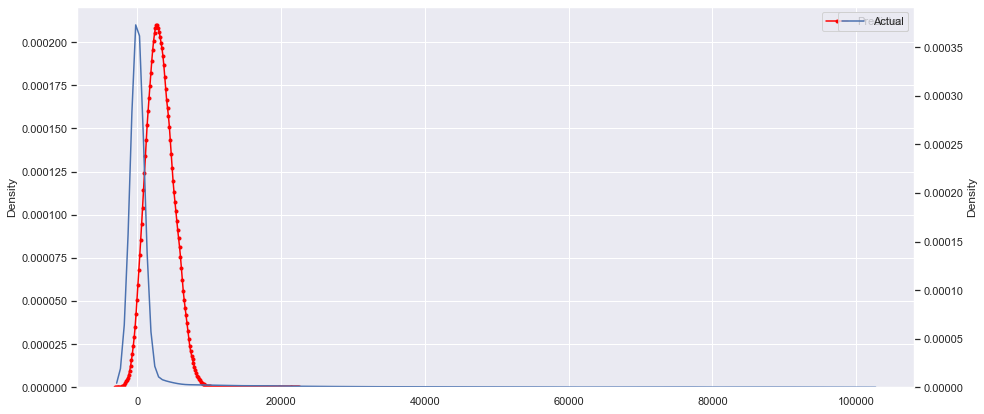

In [145]:
# Dataframe for actual versus predicted  from the the linear model
fig, ax1 = plt.subplots(figsize=(15,7))
sns.kdeplot(x=np.sort(y_test_pred[y_test_pred <= 100000]), ax=ax1, c="Red", label="Predicted", marker=".")
plt.legend()
ax2 = ax1.twinx()
sns.kdeplot(x=np.sort(y_test[y_test <= 100000]), ax=ax2, label="Actual", log_scale=False)
plt.legend()
plt.grid()
plt.show()

#y_test_pred[y_test_pred['AverageClaimAmount']<=200000]

<AxesSubplot:ylabel='Density'>

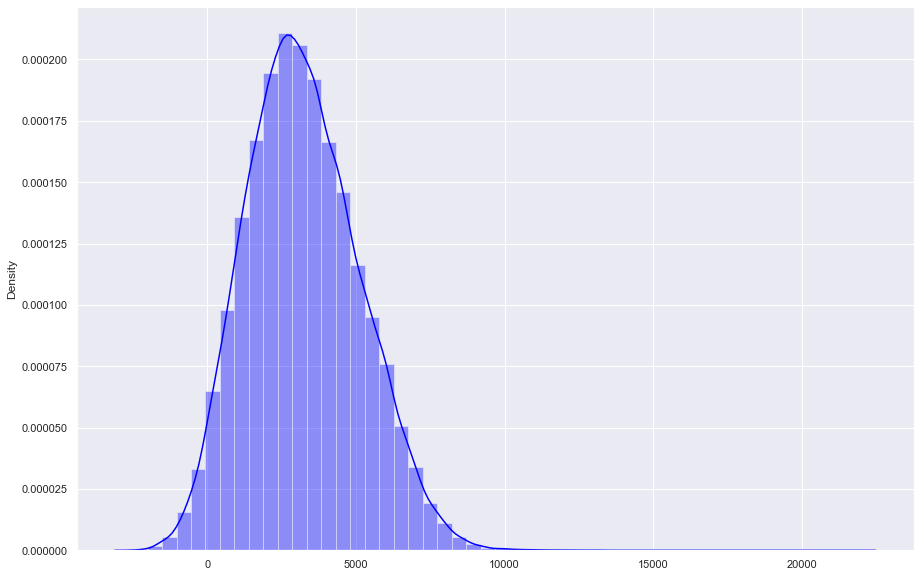

In [146]:
sns.distplot(y_test_pred, color = 'blue', label="Predicted")
#sns.distplot(y_test, color = 'red', label="Actual")

#### Model performance of our XGBoost Regressor

In [147]:
print('RMSE on train set:')
print(np.sqrt(metrics.mean_squared_error(y_train, xg_reg.predict(dm_train))))
print(' ')
print('RMSE on test set:')
print(np.sqrt(metrics.mean_squared_error(y_test, test_pred)))
print(' ')
print('MAE on train set:')
print(metrics.mean_absolute_error(y_train, xg_reg.predict(dm_train)))
print(' ')
print('MAE on test set:')
print(metrics.mean_absolute_error(y_test, test_pred))
print(' ')
print('MAPE on test set:')
print(metrics.mean_absolute_percentage_error(y_test, test_pred))
print(' ')
print('R-SQUARED on test set:')
print(metrics.r2_score(y_test,test_pred))

RMSE on train set:
19268.78719891946
 
RMSE on test set:
19876.350366409322
 
MAE on train set:
5879.85333111381
 
MAE on test set:
5976.416133962154
 
MAPE on test set:
1.2805821167570055e+19
 
R-SQUARED on test set:
0.01231684246229603


In [148]:
# Dataframe for actual versus predicted  from the the linear model
Linear_Model = pd.DataFrame({'AverageClaimAmount': y_test, 'XGBoost Predicted': test_pred})
Linear_Model

,AverageClaimAmount,XGBoost Predicted
239536,0.0,2123.831055
203147,0.0,2104.218750
79481,0.0,657.814575
126796,0.0,1545.158325
84575,0.0,2501.091309
...,...,...
246188,0.0,1449.953613
112238,0.0,3756.274902
91934,0.0,4293.447266
237760,0.0,1732.758545


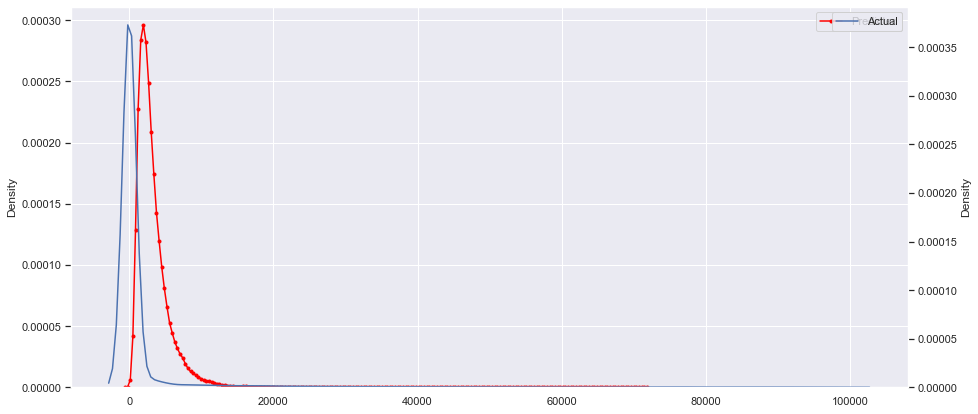

In [149]:
#comparing the actual vs predicted of xgboost using distribution plot
fig, ax1 = plt.subplots(figsize=(15,7))
sns.kdeplot(x=np.sort(test_pred[test_pred <= 100000]), ax=ax1, c="Red", label="Predicted", marker=".")
plt.legend()
ax2 = ax1.twinx()
sns.kdeplot(x=np.sort(y_test[y_test <= 100000]), ax=ax2, label="Actual", log_scale=False)
plt.legend()
plt.grid()
plt.show()

#y_test_pred[y_test_pred['AverageClaimAmount']<=200000]

<AxesSubplot:ylabel='Density'>

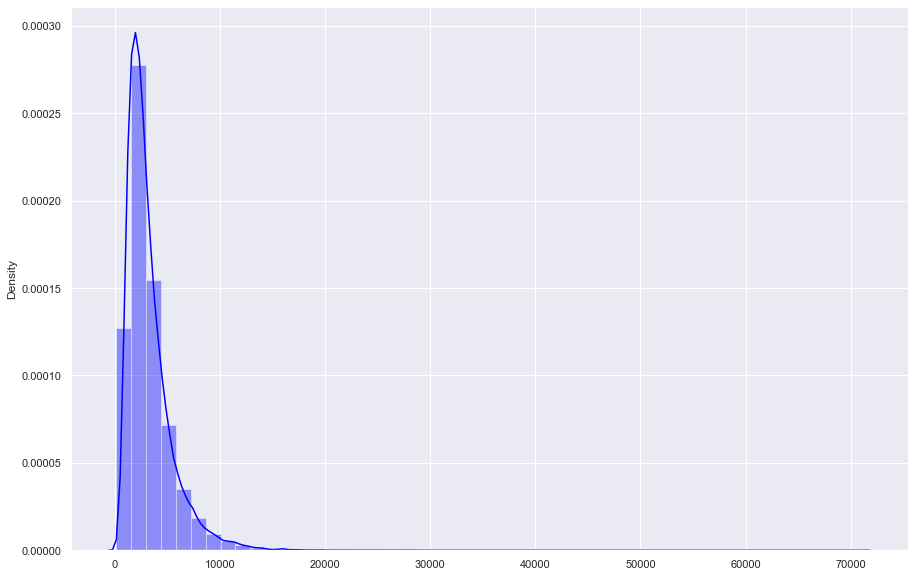

In [150]:
# distribution plot
sns.distplot(test_pred, color = 'blue', label="Predicted")
#sns.distplot(y_test, color = 'red', label="Actual")

In [151]:
#def plot_predicted_vs_actual_distribution(y_test_predict, y_test, feature_name="AverageClaimAmount", logscale = False):
    #fig, ax1 = plt.subplots()
    #sns.kdeplot(x=y_test_predict, ax=ax1, c="Red", label="Predicted", marker=".")
    #plt.legend()
    #ax2 = ax1.twinx()
    #sns.kdeplot(x=y_test[feature_name], ax=ax2, label="Actual", log_scale=logscale)
    #plt.legend()
    #plt.grid()
    #plt.show()

    #return

#def plot_predicted_vs_actual_line(y_test_predict, y_test, feature_name="AverageClaimAmount"):
    #plt.plot(y_test_predict, y_test[feature_name], ".")
    #plt.plot(y_test[feature_name],y_test[feature_name], color = "Blue", linestyle="--")
    #plt.grid()
    #plt.xlabel("Predicted")
    #plt.xlabel("Actual")
    #plt.show()

    #return

#### Computing feature importance using SHAP 

The SHAP code used below will explain the most important features for our model. it plots a bar bart to show how
much the features contribute (average impact) to the XGBoost Regressor’s performance.

In [152]:
explainer = shap.TreeExplainer(xg_reg)
shap_values = explainer.shap_values(X_test)

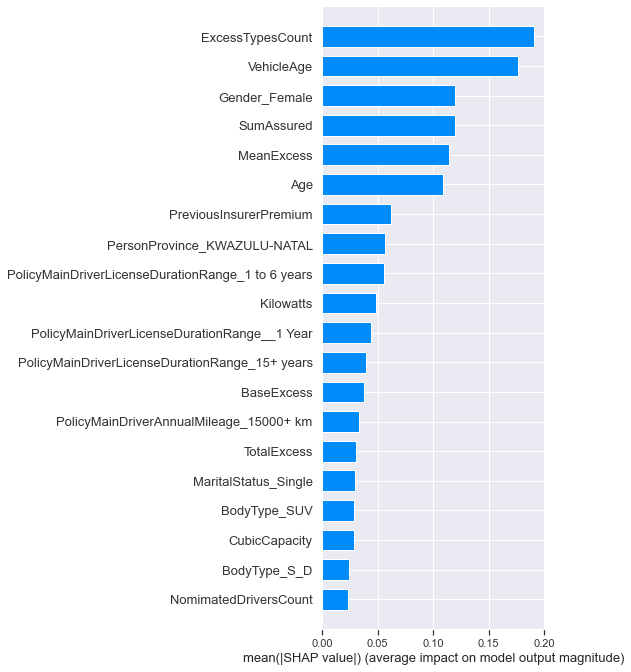

In [153]:
shap.summary_plot(shap_values, X_test, plot_type="bar")

In [154]:
# Calculating the Average predicted claim amount.
test_avg_pred_claim_amount = np.mean(test_pred)
test_avg_pred_claim_amount
# Calculating the Average actual claim amount.
test_avg_actual_claim_amount = np.mean(y_test)
test_avg_actual_claim_amount
# Dataframe for actual versus predicted
products_list = [[test_avg_actual_claim_amount, test_avg_pred_claim_amount]]
df = pd.DataFrame (products_list, columns = ['Actual AverageClaimAmount (Test)', 'Predicted AverageClaimAmount (Test)'])
df

,Actual AverageClaimAmount (Test),Predicted AverageClaimAmount (Test)
0,3437.029964,3219.804688


<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

## The best model and why it is the best choice

We have our base model and an Xgboost Regressor, and chosen our better performing model. 
Below are some important insights.

 - Linear and XGBoost regression models performed similarly as observed by the RMSE and MAE te
 - **XGBoost Regressor** performed better.

**Reason:**     
- The XGBoost has a lower Root Mean Squared Error for both the Training and Test data as compared to the base model.     
- We will choose XGBoost for our Predictions because it has the qualities for a perfect regression model(using its ensembling method) on our given dataset and gives better performing metrics.      

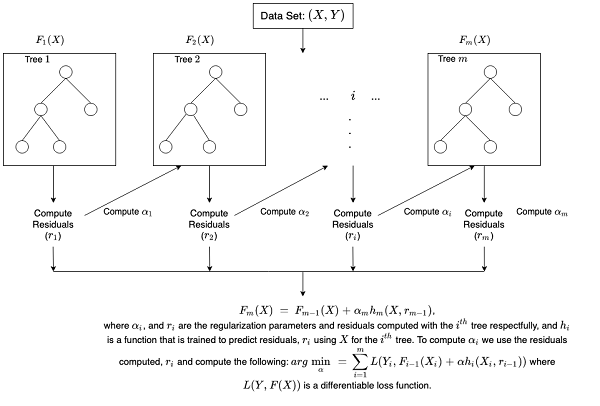

- Our Linear Regression model predicts negative values. Predicting negative values is not a good idea for price prediction.

Saving our cleaned dataset;

In [155]:
ins_claim_df.to_csv('masterset.csv', index = False)

Saving our prefered model as pickle file.

In [156]:
model_save_path = "XGBoost.pkl"
with open(model_save_path,'wb') as file:
    pickle.dump(xg_reg,file)

In [157]:
xg_reg.save_model('XGBoost.json')

**References:**
- Stefan Fereira (Mentor, Explore A.I)
- https://www.medium.com
- https://www.analyticsvidhya.com
- https://www.datacamp.com